# 4. Training model- Binary Classifier

SVM(Linear), Logistic Regression, Decision Tree, Random Forest

<hr style="border:2px solid black"> </hr>

In [2]:
# Load the processed data in file 'Data_structure_and_processing.ipynb'

import dill
dill.load_session('Data_structure_and_processing.db')

<hr style="border:2px solid black"> </hr>

### 4.1 Binary Classifier (Male: CN vs. MCI )

__CN:__ 1.0 (Cognitively Normal)  
__MCI:__ 2.0 (Mild Cognitive Impairment)

__Data:__
- __male_CN_MCI__: CN, MCI data for all male


- __male_CN_MCI_train__: After stratified sampling, the cleaned male's CN, MCI training set
- __male_CN_MCI_train_labels__: After stratified sampling, the cleaned male's CN, MCI training set labels


- __male_CN_MCI_test__: After stratified sampling, the cleaned male's CN, MCI testing set
- __male_CN_MCI_test_labels__: After stratified sampling, the cleaned male's CN, MCI testing set labels    

In [4]:
# Simplified name

x_train01 = male_CN_MCI_train
y_train01 = male_CN_MCI_train_labels
x_test01 = male_CN_MCI_test
y_test01 = male_CN_MCI_test_labels

<hr style="border:px solid black"> </hr>

### 4.1.1 SVM (Linear)
---
- __Baseline__

In [369]:
# ======================
# Training set
# Male ( CN VS. MCI )
# ======================

start = time.process_time()
svm_clf01 = SVC(kernel="linear", random_state=42)
svm_clf01.fit(x_train01, y_train01)

pred = cross_val_predict(svm_clf01, x_train01, y_train01, cv=10, n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train01, pred))
print(classification_report(y_train01, pred))

Time:  6.40625
[[85 39]
 [37 55]]
              precision    recall  f1-score   support

         1.0       0.70      0.69      0.69       124
         2.0       0.59      0.60      0.59        92

    accuracy                           0.65       216
   macro avg       0.64      0.64      0.64       216
weighted avg       0.65      0.65      0.65       216



In [4]:
# ======================
# Testing set
# Male ( CN VS. MCI )
# ======================

start = time.process_time()

pred = cross_val_predict(svm_clf01, x_test01, y_test01, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test01, pred))
print(classification_report(y_test01, pred))

Time:  0.484375
[[23  9]
 [ 8 15]]
              precision    recall  f1-score   support

         1.0       0.74      0.72      0.73        32
         2.0       0.62      0.65      0.64        23

    accuracy                           0.69        55
   macro avg       0.68      0.69      0.68        55
weighted avg       0.69      0.69      0.69        55



---
- __Feature Selection - RFECV (SVM - Linear)__

Optimal number of features : 76
Time:  2008.03125


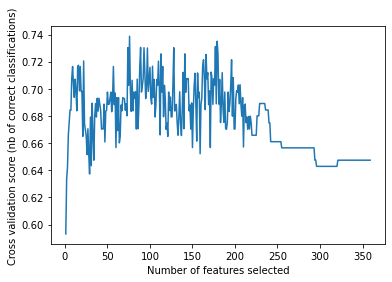

In [5]:
# ======================
# SVM (Linear) - RFECV
# Male ( CN VS. MCI )
# ======================

svm_clf02 = SVC(kernel="linear", random_state=43)
start = time.process_time()

min_features_to_select = 1  # Mini mum number of features to consider
rfecv_svm01 = RFECV(estimator=svm_clf02, step=1, cv=StratifiedKFold(10), scoring='accuracy', 
                min_features_to_select=min_features_to_select, n_jobs=-1)

rfecv_svm01.fit(x_train01, y_train01)
rfecv_svm01_x_train01 = rfecv_svm01.transform(x_train01)
rfecv_svm01_x_test01 = rfecv_svm01.transform(x_test01)


print("Optimal number of features : %d" % rfecv_svm01.n_features_)
print("Time: ", time.process_time() - start)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_svm01.grid_scores_) + min_features_to_select),
         rfecv_svm01.grid_scores_)
plt.show()

In [6]:
cols = rfecv_svm01.get_support(indices=True)
x_train_new = x_train01.iloc[:,cols]

x_train_new.columns.values.tolist()      # Optimal feature's name

['lh.bankssts.volume',
 'lh.fusiform.volume',
 'lh.inferiortemporal.volume',
 'lh.isthmuscingulate.volume',
 'lh.medialorbitofrontal.volume',
 'lh.parahippocampal.volume',
 'lh.parsorbitalis.volume',
 'lh.pericalcarine.volume',
 'lh.precentral.volume',
 'lh.precuneus.volume',
 'lh.rostralmiddlefrontal.volume',
 'lh.superiorfrontal.volume',
 'lh.frontalpole.volume',
 'lh.transversetemporal.volume',
 'rh.caudalmiddlefrontal.volume',
 'rh.entorhinal.volume',
 'rh.inferiortemporal.volume',
 'rh.lingual.volume',
 'rh.middletemporal.volume',
 'rh.parsopercularis.volume',
 'rh.parsorbitalis.volume',
 'rh.postcentral.volume',
 'rh.posteriorcingulate.volume',
 'rh.precentral.volume',
 'rh.superiorparietal.volume',
 'rh.superiortemporal.volume',
 'rh.supramarginal.volume',
 'lh.caudalanteriorcingulate.area',
 'lh.cuneus.area',
 'lh.entorhinal.area',
 'lh.inferiorparietal.area',
 'lh.inferiortemporal.area',
 'lh.lateralorbitofrontal.area',
 'lh.lingual.area',
 'lh.medialorbitofrontal.area',
 'lh.

---
- __Only use the data after RFECV__

In [1]:
# ======================
# Training set ( After RFECV)
# Male ( CN VS. MCI )
# ======================

svm_clf03 = SVC(kernel="linear", random_state=42)
start = time.process_time()
svm_clf03.fit(rfecv_svm01_x_train01, y_train01)

pred = cross_val_predict(svm_clf03, rfecv_svm01_x_train01, y_train01, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train01, pred))
print(classification_report(y_train01, pred))

NameError: name 'SVC' is not defined

In [8]:
# ======================
# Testing set (After RFECV)
# Male ( CN VS. MCI )
# ======================

start = time.process_time()

pred = cross_val_predict(svm_clf03, rfecv_svm01_x_test01, y_test01, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test01, pred))
print(classification_report(y_test01, pred))

Time:  0.0
[[25  7]
 [ 5 18]]
              precision    recall  f1-score   support

         1.0       0.83      0.78      0.81        32
         2.0       0.72      0.78      0.75        23

    accuracy                           0.78        55
   macro avg       0.78      0.78      0.78        55
weighted avg       0.79      0.78      0.78        55



---
- __RFECV (SVM) + Feature scaling + PCA__

In [25]:
# ======================
# Training set
# Male ( CN VS. MCI )
# ======================


svm_clf04 = SVC(kernel="linear", random_state=42)
start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_svm01_x_train01)

# Dimension reduction
pca = PCA(n_components=0.88)  # n_components
x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

print (pca.explained_variance_ratio_)
print (pca.explained_variance_)
print ("Components:",pca.n_components_)

svm_clf04.fit(x_train_scaled_reduced, y_train01)


pred = cross_val_predict(svm_clf04, x_train_scaled_reduced, y_train01, cv=10)


print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train01, pred))
print(classification_report(y_train01, pred))

[0.30545182 0.08701102 0.04442354 0.0410597  0.03438069 0.02822464
 0.02657825 0.02266826 0.02107294 0.01979535 0.01852815 0.01709379
 0.01658373 0.01584452 0.01494219 0.01390378 0.01348372 0.01334624
 0.01270257 0.01201368 0.01152681 0.01071542 0.01032937 0.0098667
 0.0095337  0.00921678 0.00854642 0.00817137 0.00792009 0.00756474
 0.00725262 0.00691125]
[23.32231198  6.64359519  3.39189198  3.13505118  2.62508584  2.15504983
  2.02934186  1.73080057  1.6089922   1.51144383  1.41468878  1.30517016
  1.2662254   1.20978436  1.14088807  1.06160189  1.02952902  1.01903212
  0.96988591  0.91728669  0.88011193  0.81815949  0.78868355  0.75335719
  0.7279312   0.70373303  0.65254877  0.62391264  0.60472646  0.57759409
  0.55376309  0.52769825]
Components: 32
Time:  1.25
[[94 30]
 [32 60]]
              precision    recall  f1-score   support

         1.0       0.75      0.76      0.75       124
         2.0       0.67      0.65      0.66        92

    accuracy                           0.

Text(0, 0.5, 'cumulative explained variance')

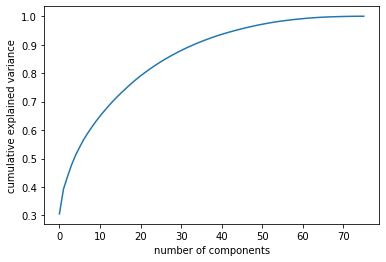

In [24]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [11]:
# =======================
# Testing set
# Male ( CN VS. MCI )
# =======================


start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(rfecv_svm01_x_test01)

# Dimension reduction
pca = PCA(n_components=0.88)
x_test_scaled_reduced = pca.fit_transform(x_test_scaled)

print ("Components:",pca.n_components_)

# confusion matrix
pred = cross_val_predict(svm_clf04, x_test_scaled_reduced, y_test01, cv=10)


print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test01, pred))
print(classification_report(y_test01, pred))

Components: 21
Time:  0.1875
[[26  6]
 [ 3 20]]
              precision    recall  f1-score   support

         1.0       0.90      0.81      0.85        32
         2.0       0.77      0.87      0.82        23

    accuracy                           0.84        55
   macro avg       0.83      0.84      0.83        55
weighted avg       0.84      0.84      0.84        55



<hr style="border:px solid black"> </hr>

## 4.1.2 Logistic Regression

- __Baseline__

In [21]:
# =======================
# Training set
# Male ( CN VS. MCI )
# =======================


log_reg01 = LogisticRegression(max_iter=60000, penalty='l2', random_state=42)
start = time.process_time()
log_reg01.fit(x_train01, y_train01)

pred = cross_val_predict(log_reg01, x_train01, y_train01, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train01, pred))
print(classification_report(y_train01, pred))

Time:  91.65625
[[92 32]
 [32 60]]
              precision    recall  f1-score   support

         1.0       0.74      0.74      0.74       124
         2.0       0.65      0.65      0.65        92

    accuracy                           0.70       216
   macro avg       0.70      0.70      0.70       216
weighted avg       0.70      0.70      0.70       216



In [22]:
# =======================
# Testing set
# Male ( CN VS. MCI )
# =======================


start = time.process_time()

pred = cross_val_predict(log_reg01, x_test01, y_test01, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test01, pred))
print(classification_report(y_test01, pred))

Time:  9.1875
[[26  6]
 [ 7 16]]
              precision    recall  f1-score   support

         1.0       0.79      0.81      0.80        32
         2.0       0.73      0.70      0.71        23

    accuracy                           0.76        55
   macro avg       0.76      0.75      0.76        55
weighted avg       0.76      0.76      0.76        55



---
- __Feature Selection - RFECV (Logistic Regression)__

Optimal number of features : 60
Time:  2237.375


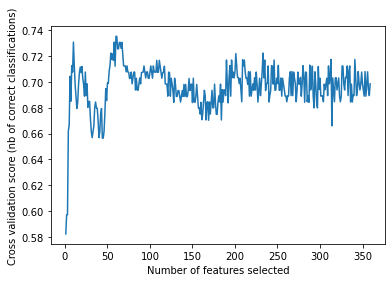

In [26]:
# ==============================
# Male ( CN VS. MCI )
# Logistic Regression - RFECV
# ==============================


log_reg02 = LogisticRegression(max_iter=100000000, penalty='l2', random_state=42)
start = time.process_time()

min_features_to_select = 1  # Mini mum number of features to consider
rfecv_lr01 = RFECV(estimator=log_reg02, step=1, cv=StratifiedKFold(10), scoring='accuracy', 
                min_features_to_select=min_features_to_select, n_jobs=-1)

rfecv_lr01.fit(x_train01, y_train01)
rfecv_lr01_x_train01 = rfecv_lr01.transform(x_train01)
rfecv_lr01_x_test01 = rfecv_lr01.transform(x_test01)


print("Optimal number of features : %d" % rfecv_lr01.n_features_)
print("Time: ", time.process_time() - start)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_lr01.grid_scores_) + min_features_to_select),
         rfecv_lr01.grid_scores_)
plt.show()

In [27]:
cols = rfecv_lr01.get_support(indices=True)
x_train_new = x_train01.iloc[:,cols]

x_train_new.columns.values.tolist()      # Optimal feature's name

['lh.bankssts.volume',
 'lh.fusiform.volume',
 'lh.isthmuscingulate.volume',
 'lh.lingual.volume',
 'lh.paracentral.volume',
 'lh.pericalcarine.volume',
 'lh.precuneus.volume',
 'lh.rostralanteriorcingulate.volume',
 'lh.rostralmiddlefrontal.volume',
 'lh.superiorfrontal.volume',
 'lh.frontalpole.volume',
 'lh.insula.volume',
 'rh.caudalmiddlefrontal.volume',
 'rh.cuneus.volume',
 'rh.entorhinal.volume',
 'rh.middletemporal.volume',
 'rh.parsopercularis.volume',
 'rh.parstriangularis.volume',
 'rh.pericalcarine.volume',
 'rh.posteriorcingulate.volume',
 'rh.precentral.volume',
 'rh.superiorparietal.volume',
 'rh.insula.volume',
 'lh.caudalanteriorcingulate.area',
 'lh.cuneus.area',
 'lh.inferiorparietal.area',
 'lh.inferiortemporal.area',
 'lh.isthmuscingulate.area',
 'lh.lingual.area',
 'lh.middletemporal.area',
 'lh.pericalcarine.area',
 'lh.postcentral.area',
 'lh.rostralanteriorcingulate.area',
 'lh.rostralmiddlefrontal.area',
 'rh.inferiorparietal.area',
 'rh.paracentral.area',
 '

---
- __Only use the data after RFECV__

In [28]:
# =======================
# Training set (RFECV)
# Male ( CN VS. MCI )
# =======================


log_reg03 = LogisticRegression(max_iter=60000, penalty='l2', random_state=42)
start = time.process_time()
log_reg03.fit(rfecv_lr01_x_train01, y_train01)

pred = cross_val_predict(log_reg03, rfecv_lr01_x_train01, y_train01, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train01, pred))
print(classification_report(y_train01, pred))

Time:  10.625
[[102  22]
 [ 20  72]]
              precision    recall  f1-score   support

         1.0       0.84      0.82      0.83       124
         2.0       0.77      0.78      0.77        92

    accuracy                           0.81       216
   macro avg       0.80      0.80      0.80       216
weighted avg       0.81      0.81      0.81       216



In [29]:
# =======================
# rfecv - test set
# =======================


start = time.process_time()

pred = cross_val_predict(log_reg03, rfecv_lr01_x_test01, y_test01, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test01, pred))
print(classification_report(y_test01, pred))

Time:  0.0
[[27  5]
 [ 7 16]]
              precision    recall  f1-score   support

         1.0       0.79      0.84      0.82        32
         2.0       0.76      0.70      0.73        23

    accuracy                           0.78        55
   macro avg       0.78      0.77      0.77        55
weighted avg       0.78      0.78      0.78        55



---
- __RFECV (Logistic Regression) + Feature scaling + PCA__

In [30]:
# =======================
# train set
# =======================


log_reg04 = LogisticRegression(max_iter=60000, penalty='l2', random_state=42)
start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_lr01_x_train01)

# Dimension reduction
pca = PCA(n_components=0.9)
x_train_scaled_reduced = pca.fit_transform(x_train_scaled)


log_reg04.fit(x_train_scaled_reduced, y_train01)

pred = cross_val_predict(log_reg04, x_train_scaled_reduced, y_train01, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(y_train01, pred))
print(classification_report(y_train01, pred))

Times:  0.65625
Confusion matrix: 
 [[98 26]
 [29 63]]
              precision    recall  f1-score   support

         1.0       0.77      0.79      0.78       124
         2.0       0.71      0.68      0.70        92

    accuracy                           0.75       216
   macro avg       0.74      0.74      0.74       216
weighted avg       0.74      0.75      0.74       216



In [31]:
# =======================
# test set
# =======================


start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_lr01_x_test01)

# Dimension reduction
pca = PCA(n_components=0.9)
x_train_scaled_reduced = pca.fit_transform(x_train_scaled)


pred = cross_val_predict(log_reg04, x_train_scaled_reduced, y_test01, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(y_test01, pred))
print(classification_report(y_test01, pred))

Times:  0.46875
Confusion matrix: 
 [[28  4]
 [ 5 18]]
              precision    recall  f1-score   support

         1.0       0.85      0.88      0.86        32
         2.0       0.82      0.78      0.80        23

    accuracy                           0.84        55
   macro avg       0.83      0.83      0.83        55
weighted avg       0.84      0.84      0.84        55



<hr style="border:px solid black"> </hr>

### 4.1.3 Decision Tree
- __Baseline__

In [17]:
# =======================
# Training set
# Male ( CN VS. MCI )
# =======================


tree_clf01 = DecisionTreeClassifier(random_state=42)
start = time.process_time()
tree_clf01.fit(x_train01, y_train01)

pred = cross_val_predict(tree_clf01, x_train01, y_train01, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train01, pred))
print(classification_report(y_train01, pred))


Time:  0.296875
[[90 34]
 [38 54]]
              precision    recall  f1-score   support

         1.0       0.70      0.73      0.71       124
         2.0       0.61      0.59      0.60        92

    accuracy                           0.67       216
   macro avg       0.66      0.66      0.66       216
weighted avg       0.67      0.67      0.67       216



In [18]:
# =======================
# Testing set
# Male ( CN VS. MCI )
# =======================


start = time.process_time()

pred = cross_val_predict(tree_clf01, x_test01, y_test01, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test01, pred))
print(classification_report(y_test01, pred))


Time:  0.09375
[[29  3]
 [ 5 18]]
              precision    recall  f1-score   support

         1.0       0.85      0.91      0.88        32
         2.0       0.86      0.78      0.82        23

    accuracy                           0.85        55
   macro avg       0.86      0.84      0.85        55
weighted avg       0.85      0.85      0.85        55



---
- __Feature Selection - RFECV (Decision Tree)__

Optimal number of features : 311
Time:  1.09375


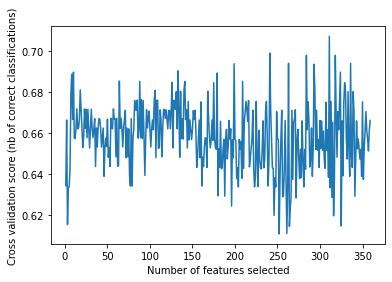

In [56]:
# =======================
# Male ( CN VS. MCI )
# Decision Tree - RFECV
# =======================


tree_clf02 = DecisionTreeClassifier(random_state=42)
start = time.process_time()

min_features_to_select = 1  # Mini mum number of features to consider
rfecv_tree01 = RFECV(estimator=tree_clf02, step=1, cv=StratifiedKFold(10), scoring='accuracy', 
                min_features_to_select=min_features_to_select, n_jobs=-1)

rfecv_tree01.fit(x_train01, y_train01)
rfecv_tree01_x_train01 = rfecv_tree01.transform(x_train01)
rfecv_tree01_x_test01 = rfecv_tree01.transform(x_test01)


print("Optimal number of features : %d" % rfecv_tree01.n_features_)
print("Time: ", time.process_time() - start)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_tree01.grid_scores_) + min_features_to_select),
         rfecv_tree01.grid_scores_)
plt.show()


In [35]:
cols = rfecv_tree01.get_support(indices=True)
x_train_new01 = x_train01.iloc[:,cols]

x_train_new01.columns.values.tolist()      # Optimal feature's name

['lh.medialorbitofrontal.thickness',
 'lh.middletemporal.thickness',
 'lh.parahippocampal.thickness',
 'lh.paracentral.thickness',
 'lh.parsopercularis.thickness',
 'lh.parsorbitalis.thickness',
 'lh.parstriangularis.thickness',
 'lh.pericalcarine.thickness',
 'lh.postcentral.thickness',
 'lh.posteriorcingulate.thickness',
 'lh.precentral.thickness',
 'lh.precuneus.thickness',
 'lh.rostralanteriorcingulate.thickness',
 'lh.rostralmiddlefrontal.thickness',
 'lh.superiorfrontal.thickness',
 'lh.superiorparietal.thickness',
 'lh.superiortemporal.thickness',
 'lh.supramarginal.thickness',
 'lh.frontalpole.thickness',
 'lh.temporalpole.thickness',
 'lh.transversetemporal.thickness',
 'lh.insula.thickness',
 'lh.MeanThickness.thickness',
 'rh.bankssts.thickness',
 'rh.caudalanteriorcingulate.thickness',
 'rh.caudalmiddlefrontal.thickness',
 'rh.cuneus.thickness',
 'rh.entorhinal.thickness',
 'rh.fusiform.thickness',
 'rh.inferiorparietal.thickness',
 'rh.inferiortemporal.thickness',
 'rh.ist

---
- feature importances

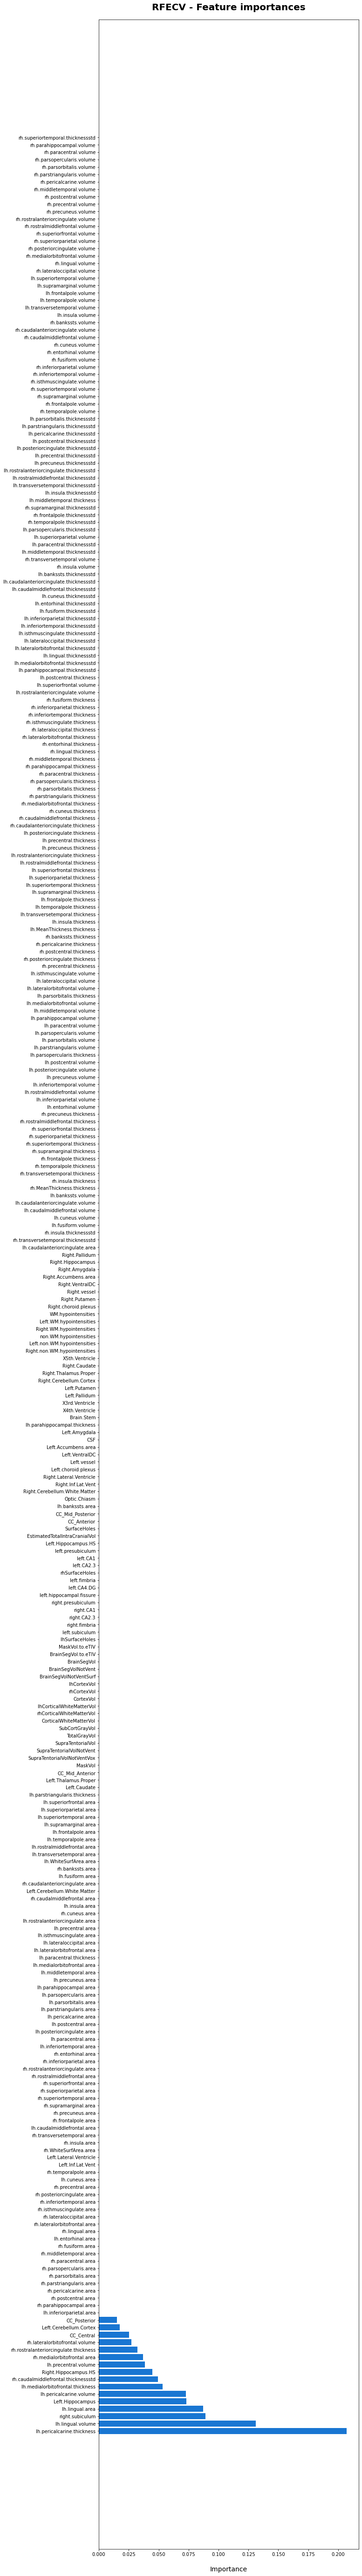

In [36]:
dset = pd.DataFrame()
dset['attr'] = x_train_new01.columns.values
dset['importance'] = rfecv_tree01.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 100))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

---
- __Only use the data after RFECV__

In [37]:
# =========================
# Training set (RFECV)
# Male ( CN VS. MCI )
# =========================


tree_clf03 = DecisionTreeClassifier(random_state=55)
start = time.process_time()
tree_clf03.fit(rfecv_svm01_x_train01, y_train01)

pred = cross_val_predict(tree_clf03, rfecv_tree01_x_train01, y_train01, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train01, pred))
print(classification_report(y_train01, pred))


Time:  0.015625
[[82 42]
 [33 59]]
              precision    recall  f1-score   support

         1.0       0.71      0.66      0.69       124
         2.0       0.58      0.64      0.61        92

    accuracy                           0.65       216
   macro avg       0.65      0.65      0.65       216
weighted avg       0.66      0.65      0.65       216



In [38]:
# =========================
# Testing set (RFECV)
# Male ( CN VS. MCI )
# =========================


start = time.process_time()

pred = cross_val_predict(tree_clf03, rfecv_tree01_x_test01, y_test01, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test01, pred))
print(classification_report(y_test01, pred))

Time:  0.015625
[[30  2]
 [ 4 19]]
              precision    recall  f1-score   support

         1.0       0.88      0.94      0.91        32
         2.0       0.90      0.83      0.86        23

    accuracy                           0.89        55
   macro avg       0.89      0.88      0.89        55
weighted avg       0.89      0.89      0.89        55



---
- __RFECV (DT) + Feature scaling + PCA__

In [108]:
# ======================
# Training set
# Male ( CN VS. MCI )
# ======================

tree_clf04 = DecisionTreeClassifier(random_state=40)
start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_tree01_x_train01)

# Dimension reduction
#pca = PCA(n_components=0.9)  # n_components
#x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

#print (pca.explained_variance_ratio_)
#print (pca.explained_variance_)
#print ("Components:",pca.n_components_)

tree_clf04.fit(x_train_scaled, y_train01)


pred = cross_val_predict(tree_clf04, x_train_scaled, y_train01, cv=10)


print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train01, pred))
print(classification_report(y_train01, pred))

Time:  0.21875
[[86 38]
 [33 59]]
              precision    recall  f1-score   support

         1.0       0.72      0.69      0.71       124
         2.0       0.61      0.64      0.62        92

    accuracy                           0.67       216
   macro avg       0.67      0.67      0.67       216
weighted avg       0.67      0.67      0.67       216



In [109]:
# =======================
# Testing set
# Male ( CN VS. MCI )
# =======================


start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(rfecv_tree01_x_test01)

# Dimension reduction
#pca = PCA(n_components=0.9)
#x_test_scaled_reduced = pca.fit_transform(x_test_scaled)

#print ("Components:",pca.n_components_)

# confusion matrix
pred = cross_val_predict(tree_clf04, x_test_scaled, y_test01, cv=10)


print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test01, pred))
print(classification_report(y_test01, pred))

Time:  0.0625
[[29  3]
 [ 3 20]]
              precision    recall  f1-score   support

         1.0       0.91      0.91      0.91        32
         2.0       0.87      0.87      0.87        23

    accuracy                           0.89        55
   macro avg       0.89      0.89      0.89        55
weighted avg       0.89      0.89      0.89        55



<hr style="border:px solid black"> </hr>

### 4.1.4 Random Forest
- __Baseline__

In [39]:
# =======================
# Training set
# Male ( CN VS. MCI )
# =======================


start = time.process_time()
forest_clf01 = RandomForestClassifier(random_state=42)
forest_clf01.fit(x_train01, y_train01)

pred = cross_val_predict(forest_clf01, x_train01, y_train01, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train01, pred))
print(classification_report(y_train01, pred))


Time:  2.046875
[[99 25]
 [39 53]]
              precision    recall  f1-score   support

         1.0       0.72      0.80      0.76       124
         2.0       0.68      0.58      0.62        92

    accuracy                           0.70       216
   macro avg       0.70      0.69      0.69       216
weighted avg       0.70      0.70      0.70       216



In [40]:
# =======================
# Testing set
# Male ( CN VS. MCI )
# =======================

start = time.process_time()

pred = cross_val_predict(forest_clf01, x_test01, y_test01, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test01, pred))
print(classification_report(y_test01, pred))


Time:  1.203125
[[26  6]
 [ 9 14]]
              precision    recall  f1-score   support

         1.0       0.74      0.81      0.78        32
         2.0       0.70      0.61      0.65        23

    accuracy                           0.73        55
   macro avg       0.72      0.71      0.71        55
weighted avg       0.72      0.73      0.72        55



---
- __Feature Selection - RFECV (Random Forest)__

Optimal number of features : 21
Time:  53.765625


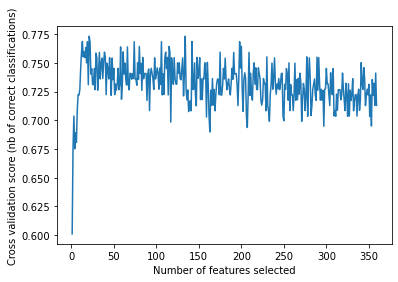

In [6]:
# =======================
# Male ( CN VS. MCI )
# Random Forest - RFECV
# =======================


forest_clf02 = RandomForestClassifier(random_state=50)
start = time.process_time()

min_features_to_select = 1  # Mini mum number of features to consider
rfecv_forest01 = RFECV(estimator=forest_clf02, step=1, cv=StratifiedKFold(10), scoring='accuracy', 
                min_features_to_select=min_features_to_select, n_jobs=-1)

rfecv_forest01.fit(x_train01, y_train01)
rfecv_forest01_x_train01 = rfecv_forest01.transform(x_train01)
rfecv_forest01_x_test01 = rfecv_forest01.transform(x_test01)


print("Optimal number of features : %d" % rfecv_forest01.n_features_)
print("Time: ", time.process_time() - start)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_forest01.grid_scores_) + min_features_to_select),
         rfecv_forest01.grid_scores_)
plt.show()


In [7]:
cols04 = rfecv_forest01.get_support(indices=True)
x_train_new04 = x_train01.iloc[:,cols04]

x_train_new04.columns.values.tolist()      # Optimal feature's name

['lh.lingual.thickness',
 'lh.medialorbitofrontal.thickness',
 'lh.pericalcarine.thickness',
 'rh.lingual.thickness',
 'rh.middletemporal.thickness',
 'rh.pericalcarine.thickness',
 'rh.rostralmiddlefrontal.thickness',
 'rh.temporalpole.thickness',
 'lh.cuneus.volume',
 'lh.lingual.volume',
 'lh.pericalcarine.volume',
 'rh.lingual.volume',
 'lh.pericalcarine.thicknessstd',
 'lh.supramarginal.thicknessstd',
 'rh.bankssts.thicknessstd',
 'rh.lingual.thicknessstd',
 'Left.Inf.Lat.Vent',
 'Left.Hippocampus',
 'Right.Inf.Lat.Vent',
 'left.subiculum',
 'right.subiculum']

---
- feature importances

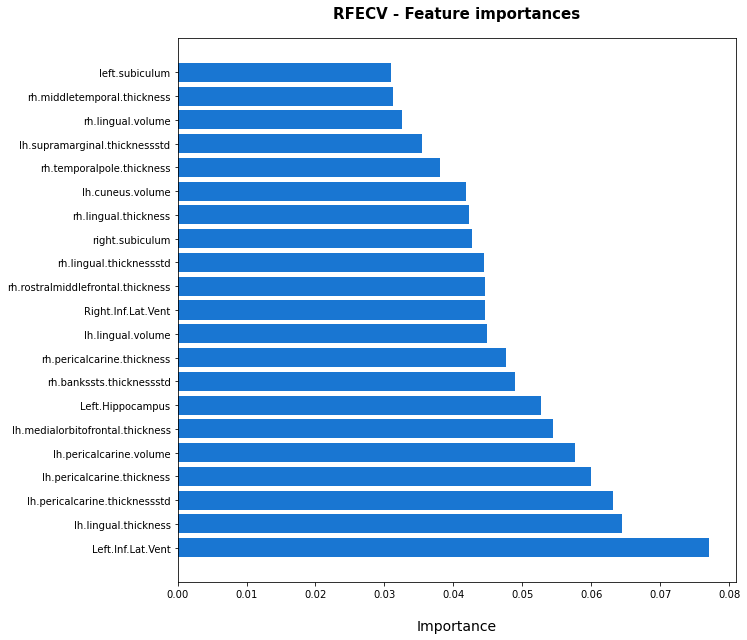

In [17]:
dset = pd.DataFrame()
dset['attr'] = x_train_new04.columns.values
dset['importance'] = rfecv_forest01.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,10))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature importances', fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

---
- __Only use the data after RFECV__

In [33]:
# =======================
# Training set (RFECV)
# Male ( CN VS. MCI )
# =======================


forest_clf03 = RandomForestClassifier()
start = time.process_time()
forest_clf03.fit(rfecv_forest01_x_train01, y_train01)

pred = cross_val_predict(forest_clf03, rfecv_forest01_x_train01, y_train01, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train01, pred))
print(classification_report(y_train01, pred))


Time:  0.140625
[[102  22]
 [ 26  66]]
              precision    recall  f1-score   support

         1.0       0.80      0.82      0.81       124
         2.0       0.75      0.72      0.73        92

    accuracy                           0.78       216
   macro avg       0.77      0.77      0.77       216
weighted avg       0.78      0.78      0.78       216



In [42]:
# =======================
# Testing set (RFECV)
# Male ( CN VS. MCI )
# =======================


start = time.process_time()

pred = cross_val_predict(forest_clf03, rfecv_forest01_x_test01, y_test01, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test01, pred))
print(classification_report(y_test01, pred))

Time:  0.046875
[[24  8]
 [ 8 15]]
              precision    recall  f1-score   support

         1.0       0.75      0.75      0.75        32
         2.0       0.65      0.65      0.65        23

    accuracy                           0.71        55
   macro avg       0.70      0.70      0.70        55
weighted avg       0.71      0.71      0.71        55



---
- __RFECV + StandardScaler + PCA__

In [54]:
# =======================
# Training set 
# Male(CN-MCI)
# =======================

forest_clf04 = RandomForestClassifier(random_state=42)
start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_forest01_x_train01)

# Dimension reduction
pca = PCA(n_components=17)
x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

print ("Components:",pca.n_components_)

forest_clf04.fit(x_train_scaled_reduced, y_train01)

pred = cross_val_predict(forest_clf04, x_train_scaled_reduced, y_train01, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(y_train01, pred))
print(classification_report(y_train01, pred))

Components: 17
Times:  2.515625
Confusion matrix: 
 [[102  22]
 [ 38  54]]
              precision    recall  f1-score   support

         1.0       0.73      0.82      0.77       124
         2.0       0.71      0.59      0.64        92

    accuracy                           0.72       216
   macro avg       0.72      0.70      0.71       216
weighted avg       0.72      0.72      0.72       216



Text(0, 0.5, 'cumulative explained variance')

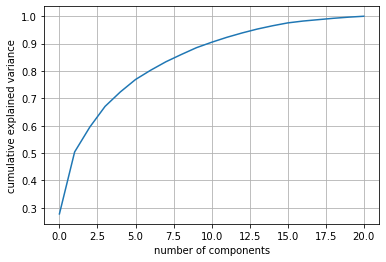

In [22]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [55]:
# =======================
# test set
# =======================

start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_forest01_x_test01)

# Dimension reduction
pca = PCA(n_components=17)
x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

print ("Components:",pca.n_components_)

pred = cross_val_predict(forest_clf04, x_train_scaled_reduced, y_test01, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(y_test01, pred))
print(classification_report(y_test01, pred))

Components: 17
Times:  1.046875
Confusion matrix: 
 [[28  4]
 [ 9 14]]
              precision    recall  f1-score   support

         1.0       0.76      0.88      0.81        32
         2.0       0.78      0.61      0.68        23

    accuracy                           0.76        55
   macro avg       0.77      0.74      0.75        55
weighted avg       0.77      0.76      0.76        55



<hr style="border:2px solid black"> </hr>

### 4.2 Binary Classifier (Male: CN vs. AD )

__CN:__ 1.0 (Cognitively Normal)  
__AD:__ 3.0 (Alzheimer's Disease)

__Data:__
- __male_CN_AD__


- __male_CN_AD_train__
- __male_CN_AD_train_labels__


- __male_CN_AD_test__
- __male_CN_AD_test_labels__

In [110]:
# Simplified name

x_train02 = male_CN_AD_train
y_train02 = male_CN_AD_train_labels

x_test02 = male_CN_AD_test
y_test02 = male_CN_AD_test_labels

<hr style="border:px solid black"> </hr>

### 4.2.1 SVM (Linear)
---
- __Baseline__

In [19]:
# ======================
# Training set
# Male ( CN VS. AD )
# ======================


svm_clf05 = SVC(kernel="linear", random_state=42)
start = time.process_time()
svm_clf05.fit(x_train02, y_train02)

pred = cross_val_predict(svm_clf05, x_train02, y_train02, cv=10, n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train02, pred))
print(classification_report(y_train02, pred))

Time:  0.5625
[[111  13]
 [  9  55]]
              precision    recall  f1-score   support

         1.0       0.93      0.90      0.91       124
         3.0       0.81      0.86      0.83        64

    accuracy                           0.88       188
   macro avg       0.87      0.88      0.87       188
weighted avg       0.89      0.88      0.88       188



In [20]:
# ======================
# Testing set
# Male ( CN VS. AD )
# ======================


start = time.process_time()

pred = cross_val_predict(svm_clf05, x_test02, y_test02, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test02, pred))
print(classification_report(y_test02, pred))

Time:  0.09375
[[27  5]
 [ 4 12]]
              precision    recall  f1-score   support

         1.0       0.87      0.84      0.86        32
         3.0       0.71      0.75      0.73        16

    accuracy                           0.81        48
   macro avg       0.79      0.80      0.79        48
weighted avg       0.82      0.81      0.81        48



---
- __Feature Selection - RFECV (SVM - Linear)__

Optimal number of features : 104
Time:  261.890625


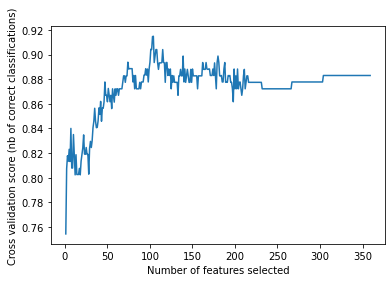

In [46]:
# ======================
# SVM (Linear)
# RFECV (Recursive Feature Elimination and Cross-Validation Selection)
# Male ( CN VS. AD )
# ======================

svm_clf06 = SVC(kernel="linear", random_state=42)
start = time.process_time()

min_features_to_select = 1  # Mini mum number of features to consider
rfecv_svm02 = RFECV(estimator=svm_clf06, step=1, cv=StratifiedKFold(10), scoring='accuracy', 
                min_features_to_select=min_features_to_select, n_jobs=-1)

rfecv_svm02.fit(x_train02, y_train02)
rfecv_svm02_x_train02 = rfecv_svm02.transform(x_train02)
rfecv_svm02_x_test02 = rfecv_svm02.transform(x_test02)


print("Optimal number of features : %d" % rfecv_svm02.n_features_)
print("Time: ", time.process_time() - start)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_svm02.grid_scores_) + min_features_to_select),
         rfecv_svm02.grid_scores_)
plt.show()

In [47]:
cols = rfecv_svm02.get_support(indices=True)
x_train_new = x_train02.iloc[:,cols]

x_train_new.columns.values.tolist()      # Optimal feature's name

['lh.caudalanteriorcingulate.volume',
 'lh.caudalmiddlefrontal.volume',
 'lh.cuneus.volume',
 'lh.entorhinal.volume',
 'lh.fusiform.volume',
 'lh.isthmuscingulate.volume',
 'lh.lateralorbitofrontal.volume',
 'lh.lingual.volume',
 'lh.medialorbitofrontal.volume',
 'lh.parahippocampal.volume',
 'lh.paracentral.volume',
 'lh.pericalcarine.volume',
 'lh.postcentral.volume',
 'lh.posteriorcingulate.volume',
 'lh.precentral.volume',
 'lh.precuneus.volume',
 'lh.rostralanteriorcingulate.volume',
 'lh.superiorfrontal.volume',
 'lh.superiorparietal.volume',
 'lh.superiortemporal.volume',
 'lh.supramarginal.volume',
 'lh.frontalpole.volume',
 'lh.temporalpole.volume',
 'lh.insula.volume',
 'rh.caudalanteriorcingulate.volume',
 'rh.caudalmiddlefrontal.volume',
 'rh.cuneus.volume',
 'rh.entorhinal.volume',
 'rh.fusiform.volume',
 'rh.inferiorparietal.volume',
 'rh.inferiortemporal.volume',
 'rh.isthmuscingulate.volume',
 'rh.lateraloccipital.volume',
 'rh.lateralorbitofrontal.volume',
 'rh.lingual

---
- __Only use the data after RFECV__

In [48]:
# ======================
# Training set ( After RFECV)
# Male ( CN VS. AD )
# ======================

svm_clf07 = SVC(kernel="linear", random_state=42)
start = time.process_time()
svm_clf07.fit(rfecv_svm02_x_train02, y_train02)

pred = cross_val_predict(svm_clf07, rfecv_svm02_x_train02, y_train02, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train02, pred))
print(classification_report(y_train02, pred))

Time:  0.75
[[119   5]
 [  6  58]]
              precision    recall  f1-score   support

         1.0       0.95      0.96      0.96       124
         3.0       0.92      0.91      0.91        64

    accuracy                           0.94       188
   macro avg       0.94      0.93      0.93       188
weighted avg       0.94      0.94      0.94       188



In [49]:
# ======================
# Testing set (After RFECV)
# Male ( CN VS. AD )
# ======================

start = time.process_time()

pred = cross_val_predict(svm_clf07, rfecv_svm02_x_test02, y_test02, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test02, pred))
print(classification_report(y_test02, pred))

Time:  0.015625
[[31  1]
 [ 4 12]]
              precision    recall  f1-score   support

         1.0       0.89      0.97      0.93        32
         3.0       0.92      0.75      0.83        16

    accuracy                           0.90        48
   macro avg       0.90      0.86      0.88        48
weighted avg       0.90      0.90      0.89        48



---
- __RFECV (SVM) + Feature scaling + PCA__

In [104]:
# ======================
# Training set
# Male ( CN VS. AD )
# ======================


svm_clf08 = SVC(kernel="linear", random_state=42)
start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_svm02_x_train02)

# Dimension reduction
pca = PCA(n_components=0.95)  # n_components
x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

print (pca.explained_variance_ratio_)
print (pca.explained_variance_)
print ("Components:",pca.n_components_)

svm_clf08.fit(x_train_scaled_reduced, y_train02)


pred = cross_val_predict(svm_clf08, x_train_scaled_reduced, y_train02, cv=10)


print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train02, pred))
print(classification_report(y_train02, pred))

[0.34151294 0.09091449 0.05084295 0.03393724 0.03022249 0.02628118
 0.02229434 0.02110213 0.02037364 0.01807817 0.01565481 0.01504407
 0.01464859 0.01258565 0.01227648 0.01215517 0.01185461 0.01110724
 0.0105818  0.00993463 0.00965445 0.00931117 0.00889991 0.0086739
 0.00788402 0.00765985 0.00705805 0.00697134 0.00690436 0.0068083
 0.00653002 0.00629079 0.00605984 0.005565   0.00505095 0.00492325
 0.00480988 0.00455259 0.0044146  0.00417401 0.0040306  0.00382725
 0.00374684 0.00359319 0.00346702 0.00337086 0.00321359 0.00308839
 0.00298602 0.00289166 0.00284357]
[35.70727805  9.50566859  5.31594345  3.54834741  3.15994668  2.74785855
  2.33101076  2.2063571   2.13018985  1.89018432  1.63680713  1.57295037
  1.53160027  1.31590662  1.28358146  1.27089777  1.2394722   1.16132978
  1.10639277  1.03872667  1.00943238  0.97353994  0.9305401   0.90690914
  0.82432323  0.80088404  0.73796202  0.72889612  0.7218934   0.71184966
  0.68275411  0.65774034  0.63359316  0.58185541  0.52810823  0.51

Text(0, 0.5, 'cumulative explained variance')

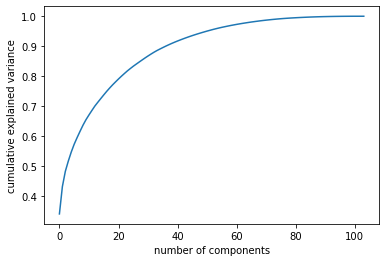

In [51]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [124]:
# =======================
# Testing set
# Male ( CN VS. AD )
# =======================


start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(rfecv_svm02_x_test02)

# Dimension reduction
pca = PCA(n_components=0.95)
x_test_scaled_reduced = pca.fit_transform(x_test_scaled)

print ("Components:",pca.n_components_)

# confusion matrix
pred = cross_val_predict(svm_clf08, x_test_scaled_reduced, y_test02, cv=10)


print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test02, pred))
print(classification_report(y_test02, pred))

Components: 27
Time:  0.109375
[[31  1]
 [ 3 13]]
              precision    recall  f1-score   support

         1.0       0.91      0.97      0.94        32
         3.0       0.93      0.81      0.87        16

    accuracy                           0.92        48
   macro avg       0.92      0.89      0.90        48
weighted avg       0.92      0.92      0.92        48



<hr style="border:px solid black"> </hr>

## 4.2.2 Logistic Regression
- __Baseline__

In [125]:
# =======================
# Training set
# Male ( CN VS. AD )
# =======================


log_reg05 = LogisticRegression(max_iter=60000, penalty='l2', random_state=42)
start = time.process_time()
log_reg05.fit(x_train02, y_train02)

pred = cross_val_predict(log_reg05, x_train02, y_train02, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train02, pred))
print(classification_report(y_train02, pred))

Time:  34.453125
[[113  11]
 [ 15  49]]
              precision    recall  f1-score   support

         1.0       0.88      0.91      0.90       124
         3.0       0.82      0.77      0.79        64

    accuracy                           0.86       188
   macro avg       0.85      0.84      0.84       188
weighted avg       0.86      0.86      0.86       188



In [183]:
# =======================
# Testing set
# Male ( CN VS. AD )
# =======================


start = time.process_time()

pred = cross_val_predict(log_reg05, x_test02, y_test02, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test02, pred))
print(classification_report(y_test02, pred))

Time:  3.328125
[[30  2]
 [ 5 11]]
              precision    recall  f1-score   support

         1.0       0.86      0.94      0.90        32
         3.0       0.85      0.69      0.76        16

    accuracy                           0.85        48
   macro avg       0.85      0.81      0.83        48
weighted avg       0.85      0.85      0.85        48



---
- __Feature Selection - RFECV (Logistic Regression)__

Optimal number of features : 31
Time:  630.21875


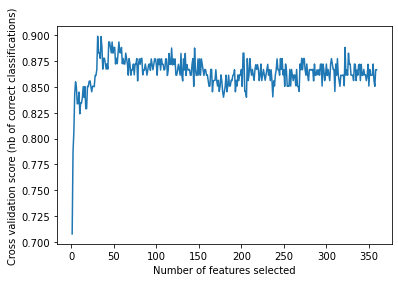

In [128]:
# ==============================
# Male ( CN VS. AD )
# Logistic Regression - RFECV
# ==============================


log_reg06 = LogisticRegression(max_iter=100000000, penalty='l2', random_state=42)
start = time.process_time()

min_features_to_select = 1  # Mini mum number of features to consider
rfecv_lr02 = RFECV(estimator=log_reg06, step=1, cv=StratifiedKFold(10), scoring='accuracy', 
                min_features_to_select=min_features_to_select, n_jobs=-1)

rfecv_lr02.fit(x_train02, y_train02)
rfecv_lr02_x_train02 = rfecv_lr02.transform(x_train02)
rfecv_lr02_x_test02 = rfecv_lr02.transform(x_test02)


print("Optimal number of features : %d" % rfecv_lr02.n_features_)
print("Time: ", time.process_time() - start)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_lr02.grid_scores_) + min_features_to_select),
         rfecv_lr02.grid_scores_)
plt.show()

In [129]:
cols = rfecv_lr02.get_support(indices=True)
x_train_new = x_train02.iloc[:,cols]

x_train_new.columns.values.tolist()      # Optimal feature's name

['lh.caudalmiddlefrontal.volume',
 'lh.cuneus.volume',
 'lh.lateralorbitofrontal.volume',
 'lh.lingual.volume',
 'lh.postcentral.volume',
 'lh.precentral.volume',
 'lh.precuneus.volume',
 'lh.superiorfrontal.volume',
 'lh.supramarginal.volume',
 'lh.temporalpole.volume',
 'lh.insula.volume',
 'rh.entorhinal.volume',
 'rh.isthmuscingulate.volume',
 'rh.lateralorbitofrontal.volume',
 'rh.medialorbitofrontal.volume',
 'rh.middletemporal.volume',
 'rh.parahippocampal.volume',
 'rh.supramarginal.volume',
 'rh.inferiorparietal.area',
 'rh.isthmuscingulate.area',
 'Left.Inf.Lat.Vent',
 'Left.Putamen',
 'Left.Hippocampus',
 'CSF',
 'Left.Accumbens.area',
 'Right.Inf.Lat.Vent',
 'Right.Pallidum',
 'left.CA1',
 'left.subiculum',
 'right.CA1',
 'right.subiculum']

---
- __Only use the data after RFECV__

In [130]:
# =======================
# Training set (RFECV)
# Male ( CN VS. AD )
# =======================


log_reg07 = LogisticRegression(max_iter=60000, penalty='l2', random_state=42)
start = time.process_time()
log_reg07.fit(rfecv_lr02_x_train02, y_train02)

pred = cross_val_predict(log_reg07, rfecv_lr02_x_train02, y_train02, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train02, pred))
print(classification_report(y_train02, pred))

Time:  0.1875
[[121   3]
 [  5  59]]
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       124
         3.0       0.95      0.92      0.94        64

    accuracy                           0.96       188
   macro avg       0.96      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188



In [131]:
# =======================
# rfecv - test set
# =======================


start = time.process_time()

pred = cross_val_predict(log_reg07, rfecv_lr02_x_test02, y_test02, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test02, pred))
print(classification_report(y_test02, pred))

Time:  0.0
[[28  4]
 [ 5 11]]
              precision    recall  f1-score   support

         1.0       0.85      0.88      0.86        32
         3.0       0.73      0.69      0.71        16

    accuracy                           0.81        48
   macro avg       0.79      0.78      0.79        48
weighted avg       0.81      0.81      0.81        48



---
- __RFECV (Logistic Regression) + Feature scaling + PCA__

In [181]:
# =======================
##### train set
# =======================


log_reg08 = LogisticRegression(max_iter=60000, penalty='l2', random_state=42)
start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_lr02_x_train02)

# Dimension reduction
pca = PCA(n_components=0.8)
x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

print ("Components:",pca.n_components_)

log_reg08.fit(x_train_scaled_reduced, y_train02)

pred = cross_val_predict(log_reg08, x_train_scaled_reduced, y_train02, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(y_train02, pred))
print(classification_report(y_train02, pred))

Components: 11
Times:  0.46875
Confusion matrix: 
 [[118   6]
 [  5  59]]
              precision    recall  f1-score   support

         1.0       0.96      0.95      0.96       124
         3.0       0.91      0.92      0.91        64

    accuracy                           0.94       188
   macro avg       0.93      0.94      0.94       188
weighted avg       0.94      0.94      0.94       188



In [182]:
# =======================
# test set
# =======================


start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_lr02_x_test02)

# Dimension reduction
pca = PCA(n_components=0.8)
x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

print ("Components:",pca.n_components_)

pred = cross_val_predict(log_reg08, x_train_scaled_reduced, y_test02, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(y_test02, pred))
print(classification_report(y_test02, pred))

Components: 7
Times:  0.046875
Confusion matrix: 
 [[31  1]
 [ 3 13]]
              precision    recall  f1-score   support

         1.0       0.91      0.97      0.94        32
         3.0       0.93      0.81      0.87        16

    accuracy                           0.92        48
   macro avg       0.92      0.89      0.90        48
weighted avg       0.92      0.92      0.92        48



<hr style="border:px solid black"> </hr>

## 4.2.3 Decision Tree
- __Baseline__

In [11]:
# =======================
# Training set
# Male ( CN VS. AD )
# =======================


tree_clf05 = DecisionTreeClassifier(random_state=40)
start = time.process_time()
tree_clf05.fit(x_train02, y_train02)

pred = cross_val_predict(tree_clf05, x_train02, y_train02, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train02, pred))
print(classification_report(y_train02, pred))

Time:  0.265625
[[112  12]
 [ 12  52]]
              precision    recall  f1-score   support

         1.0       0.90      0.90      0.90       124
         3.0       0.81      0.81      0.81        64

    accuracy                           0.87       188
   macro avg       0.86      0.86      0.86       188
weighted avg       0.87      0.87      0.87       188



In [12]:
# =======================
# Testing set
# Male ( CN VS. AD )
# =======================


start = time.process_time()

pred = cross_val_predict(tree_clf05, x_test02, y_test02, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test02, pred))
print(classification_report(y_test02, pred))

Time:  0.078125
[[30  2]
 [ 6 10]]
              precision    recall  f1-score   support

         1.0       0.83      0.94      0.88        32
         3.0       0.83      0.62      0.71        16

    accuracy                           0.83        48
   macro avg       0.83      0.78      0.80        48
weighted avg       0.83      0.83      0.83        48



---
- __Feature Selection - RFECV (Decision Tree)__

Optimal number of features : 249
Time:  1.9375


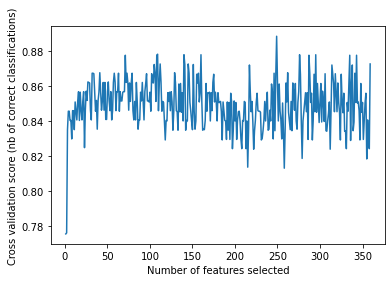

In [113]:
# =======================
# Male ( CN VS. AD )
# Decision Tree - RFECV
# =======================


tree_clf06 = DecisionTreeClassifier(random_state=42)
start = time.process_time()

min_features_to_select = 1  # Mini mum number of features to consider
rfecv_tree02 = RFECV(estimator=tree_clf06, step=1, cv=StratifiedKFold(10), scoring='accuracy', 
                min_features_to_select=min_features_to_select, n_jobs=-1)

rfecv_tree02.fit(x_train02, y_train02)
rfecv_tree02_x_train02 = rfecv_tree02.transform(x_train02)
rfecv_tree02_x_test02 = rfecv_tree02.transform(x_test02)


print("Optimal number of features : %d" % rfecv_tree02.n_features_)
print("Time: ", time.process_time() - start)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_tree02.grid_scores_) + min_features_to_select),
         rfecv_tree02.grid_scores_)
plt.show()

In [4]:
cols = rfecv_tree02.get_support(indices=True)
x_train_new03 = x_train02.iloc[:,cols]

x_train_new03.columns.values.tolist()      # Optimal feature's name

['lh.entorhinal.thickness',
 'lh.fusiform.thickness',
 'lh.inferiorparietal.thickness',
 'lh.inferiortemporal.thickness',
 'lh.isthmuscingulate.thickness',
 'lh.lateraloccipital.thickness',
 'lh.lateralorbitofrontal.thickness',
 'lh.lingual.thickness',
 'lh.medialorbitofrontal.thickness',
 'lh.middletemporal.thickness',
 'lh.parahippocampal.thickness',
 'lh.paracentral.thickness',
 'lh.parsopercularis.thickness',
 'lh.parsorbitalis.thickness',
 'lh.parstriangularis.thickness',
 'lh.pericalcarine.thickness',
 'lh.postcentral.thickness',
 'lh.posteriorcingulate.thickness',
 'lh.precentral.thickness',
 'lh.precuneus.thickness',
 'lh.rostralanteriorcingulate.thickness',
 'lh.rostralmiddlefrontal.thickness',
 'lh.superiorfrontal.thickness',
 'lh.superiorparietal.thickness',
 'lh.superiortemporal.thickness',
 'lh.supramarginal.thickness',
 'lh.frontalpole.thickness',
 'lh.temporalpole.thickness',
 'lh.transversetemporal.thickness',
 'lh.insula.thickness',
 'lh.MeanThickness.thickness',
 'rh.

- feature importances

In [194]:
dset = pd.DataFrame()
dset['attr'] = x_train_new03.columns.values
dset['importance'] = rfecv_tree02.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)

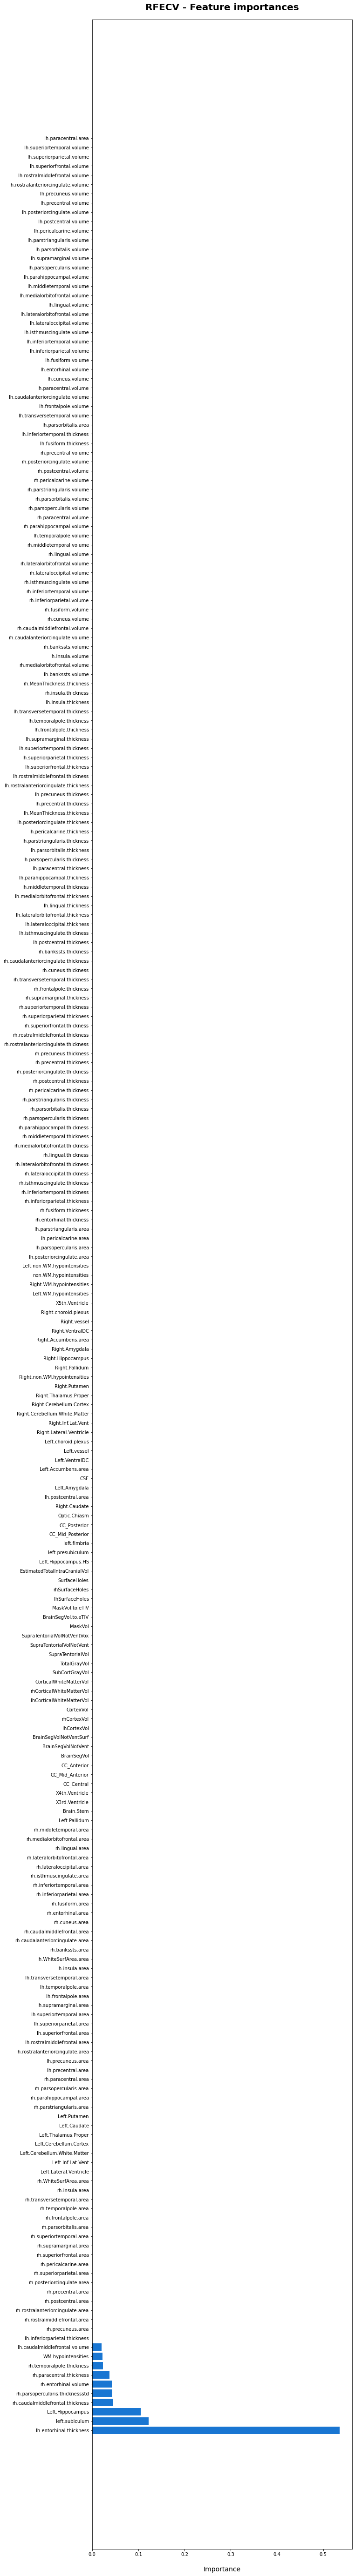

In [192]:
plt.figure(figsize=(10, 100))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

---
- __Only use the data after RFECV__

In [13]:
# =========================
# Training set (RFECV)
# Male ( CN VS. AD )
# =========================


tree_clf07 = DecisionTreeClassifier(random_state=40)
start = time.process_time()
tree_clf07.fit(rfecv_tree02_x_train02, y_train02)

pred = cross_val_predict(tree_clf07, rfecv_tree02_x_train02, y_train02, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train02, pred))
print(classification_report(y_train02, pred))

Time:  0.015625
[[110  14]
 [ 11  53]]
              precision    recall  f1-score   support

         1.0       0.91      0.89      0.90       124
         3.0       0.79      0.83      0.81        64

    accuracy                           0.87       188
   macro avg       0.85      0.86      0.85       188
weighted avg       0.87      0.87      0.87       188



In [14]:
# =========================
# Testing set (RFECV)
# Male ( CN VS. AD )
# =========================


start = time.process_time()

pred = cross_val_predict(tree_clf07, rfecv_tree02_x_test02, y_test02, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test02, pred))
print(classification_report(y_test02, pred))

Time:  0.015625
[[30  2]
 [ 4 12]]
              precision    recall  f1-score   support

         1.0       0.88      0.94      0.91        32
         3.0       0.86      0.75      0.80        16

    accuracy                           0.88        48
   macro avg       0.87      0.84      0.85        48
weighted avg       0.87      0.88      0.87        48



---
- __RFECV (DT) + Feature scaling + PCA__

In [188]:
# ======================
# Training set
# Male ( CN VS. AD )
# ======================

tree_clf08 = DecisionTreeClassifier(random_state=40)
start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_tree02_x_train02)

# Dimension reduction
#pca = PCA(n_components=0.6)  # n_components
#x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

#print (pca.explained_variance_ratio_)
#print (pca.explained_variance_)
print ("Components:",pca.n_components_)

tree_clf08.fit(x_train_scaled, y_train02)


pred = cross_val_predict(tree_clf08, x_train_scaled, y_train02, cv=10)


print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train02, pred))
print(classification_report(y_train02, pred))

Components: 24
Time:  0.1875
[[110  14]
 [ 11  53]]
              precision    recall  f1-score   support

         1.0       0.91      0.89      0.90       124
         3.0       0.79      0.83      0.81        64

    accuracy                           0.87       188
   macro avg       0.85      0.86      0.85       188
weighted avg       0.87      0.87      0.87       188



In [189]:
# =======================
# Testing set
# Male ( CN VS. AD )
# =======================


start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(rfecv_tree02_x_test02)

# Dimension reduction
#pca = PCA(n_components=0.6)
#x_test_scaled_reduced = pca.fit_transform(x_test_scaled)

print ("Components:",pca.n_components_)

# confusion matrix
pred = cross_val_predict(tree_clf08, x_test_scaled, y_test02, cv=10)


print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test02, pred))
print(classification_report(y_test02, pred))

Components: 24
Time:  0.03125
[[30  2]
 [ 4 12]]
              precision    recall  f1-score   support

         1.0       0.88      0.94      0.91        32
         3.0       0.86      0.75      0.80        16

    accuracy                           0.88        48
   macro avg       0.87      0.84      0.85        48
weighted avg       0.87      0.88      0.87        48



<hr style="border:px solid black"> </hr>

## 4.2.4 Random Forest
- __Baseline__

In [304]:
# =======================
# Training set
# Male ( CN VS. AD )
# =======================


start = time.process_time()
forest_clf05 = RandomForestClassifier(random_state=42)
forest_clf05.fit(x_train02, y_train02)

pred = cross_val_predict(forest_clf05, x_train02, y_train02, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train02, pred))
print(classification_report(y_train02, pred))

Time:  1.8125
[[112  12]
 [ 16  48]]
              precision    recall  f1-score   support

         1.0       0.88      0.90      0.89       124
         3.0       0.80      0.75      0.77        64

    accuracy                           0.85       188
   macro avg       0.84      0.83      0.83       188
weighted avg       0.85      0.85      0.85       188



In [305]:
# =======================
# Testing set
# Male ( CN VS. AD )
# =======================

start = time.process_time()

pred = cross_val_predict(forest_clf05, x_test02, y_test02, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test02, pred))
print(classification_report(y_test02, pred))

Time:  1.140625
[[31  1]
 [ 4 12]]
              precision    recall  f1-score   support

         1.0       0.89      0.97      0.93        32
         3.0       0.92      0.75      0.83        16

    accuracy                           0.90        48
   macro avg       0.90      0.86      0.88        48
weighted avg       0.90      0.90      0.89        48



---
- __Feature Selection - RFECV (Random Forest)__

Optimal number of features : 107
Time:  40.625


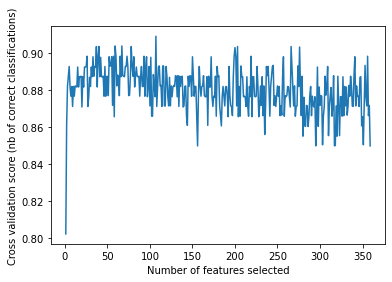

In [190]:
# =======================
# Male ( CN VS. AD )
# Random Forest - RFECV
# =======================


forest_clf06 = RandomForestClassifier(random_state=42)
start = time.process_time()

min_features_to_select = 1  # Mini mum number of features to consider
rfecv_forest02 = RFECV(estimator=forest_clf06, step=1, cv=StratifiedKFold(10), scoring='accuracy', 
                min_features_to_select=min_features_to_select, n_jobs=-1)

rfecv_forest02.fit(x_train02, y_train02)
rfecv_forest02_x_train02 = rfecv_forest02.transform(x_train02)
rfecv_forest02_x_test02 = rfecv_forest02.transform(x_test02)


print("Optimal number of features : %d" % rfecv_forest02.n_features_)
print("Time: ", time.process_time() - start)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_forest02.grid_scores_) + min_features_to_select),
         rfecv_forest02.grid_scores_)
plt.show()

In [212]:
cols = rfecv_forest02.get_support(indices=True)
x_train_new04 = x_train02.iloc[:,cols]

x_train_new04.columns.values.tolist()      # Optimal feature's name

['lh.caudalanteriorcingulate.thickness',
 'lh.caudalmiddlefrontal.thickness',
 'lh.cuneus.thickness',
 'lh.entorhinal.thickness',
 'lh.fusiform.thickness',
 'lh.inferiorparietal.thickness',
 'lh.inferiortemporal.thickness',
 'lh.isthmuscingulate.thickness',
 'lh.lingual.thickness',
 'lh.middletemporal.thickness',
 'lh.parahippocampal.thickness',
 'lh.pericalcarine.thickness',
 'lh.rostralmiddlefrontal.thickness',
 'lh.superiorfrontal.thickness',
 'lh.superiorparietal.thickness',
 'lh.superiortemporal.thickness',
 'lh.temporalpole.thickness',
 'lh.insula.thickness',
 'lh.MeanThickness.thickness',
 'rh.caudalmiddlefrontal.thickness',
 'rh.cuneus.thickness',
 'rh.entorhinal.thickness',
 'rh.inferiortemporal.thickness',
 'rh.lingual.thickness',
 'rh.middletemporal.thickness',
 'rh.parahippocampal.thickness',
 'rh.paracentral.thickness',
 'rh.pericalcarine.thickness',
 'rh.superiorfrontal.thickness',
 'rh.temporalpole.thickness',
 'rh.transversetemporal.thickness',
 'lh.entorhinal.volume',


- feature importances

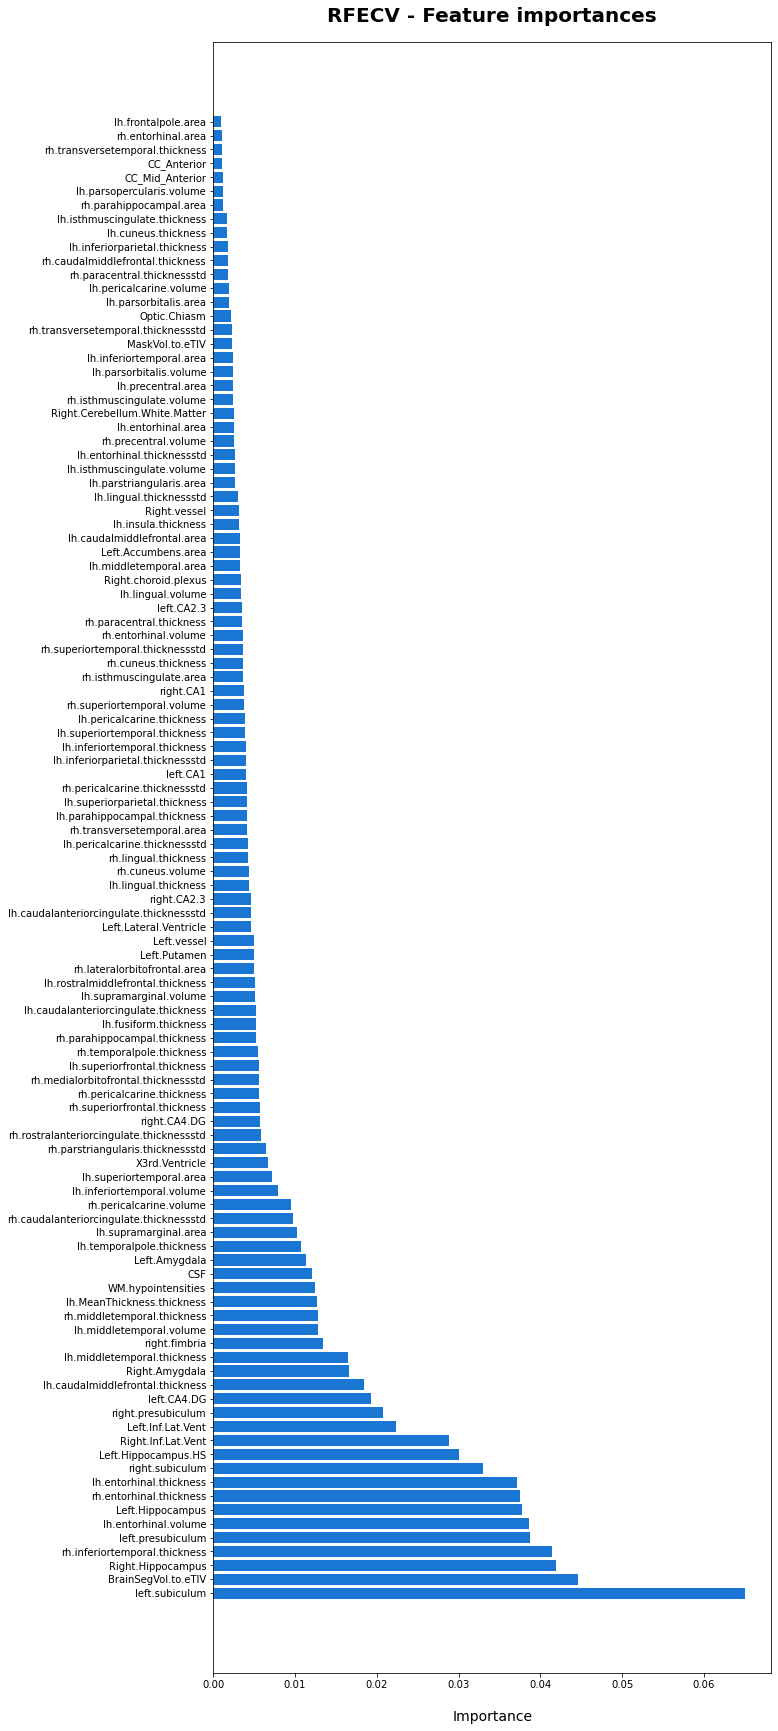

In [215]:
dset = pd.DataFrame()
dset['attr'] = x_train_new04.columns.values
dset['importance'] = rfecv_forest02.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 30))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

---
- __Only use the data after RFECV__

In [350]:
# =======================
# Training set (RFECV)
# Male ( CN VS. AD )
# =======================


forest_clf07 = RandomForestClassifier(random_state=46)
start = time.process_time()
forest_clf07.fit(rfecv_forest02_x_train02, y_train02)

pred = cross_val_predict(forest_clf07, rfecv_forest02_x_train02, y_train02, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train02, pred))
print(classification_report(y_train02, pred))

Time:  0.171875
[[117   7]
 [ 14  50]]
              precision    recall  f1-score   support

         1.0       0.89      0.94      0.92       124
         3.0       0.88      0.78      0.83        64

    accuracy                           0.89       188
   macro avg       0.89      0.86      0.87       188
weighted avg       0.89      0.89      0.89       188



In [351]:
# =======================
# Testing set (RFECV)
# Male ( CN VS. MCI )
# =======================


start = time.process_time()

pred = cross_val_predict(forest_clf07, rfecv_forest02_x_test02, y_test02, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test02, pred))
print(classification_report(y_test02, pred))

Time:  0.015625
[[32  0]
 [ 3 13]]
              precision    recall  f1-score   support

         1.0       0.91      1.00      0.96        32
         3.0       1.00      0.81      0.90        16

    accuracy                           0.94        48
   macro avg       0.96      0.91      0.93        48
weighted avg       0.94      0.94      0.94        48



---
- __RFECV (RF) + Feature scaling + PCA__

In [224]:
# =======================
# Training set 
# Male(CN-AD)
# =======================

forest_clf08 = RandomForestClassifier(random_state=41)
start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_forest02_x_train02)

# Dimension reduction
#pca = PCA(n_components=0.95)
#x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

print ("Components:",pca.n_components_)

forest_clf08.fit(x_train_scaled, y_train02)

pred = cross_val_predict(forest_clf08, x_train_scaled, y_train02, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(y_train02, pred))
print(classification_report(y_train02, pred))

Components: 28
Times:  1.59375
Confusion matrix: 
 [[117   7]
 [ 15  49]]
              precision    recall  f1-score   support

         1.0       0.89      0.94      0.91       124
         3.0       0.88      0.77      0.82        64

    accuracy                           0.88       188
   macro avg       0.88      0.85      0.87       188
weighted avg       0.88      0.88      0.88       188



In [225]:
# =======================
# test set
# =======================

start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_forest02_x_test02)

# Dimension reduction
#pca = PCA(n_components=0.95)
#x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

print ("Components:",pca.n_components_)

pred = cross_val_predict(forest_clf08, x_train_scaled, y_test02, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(y_test02, pred))
print(classification_report(y_test02, pred))

Components: 28
Times:  1.09375
Confusion matrix: 
 [[31  1]
 [ 2 14]]
              precision    recall  f1-score   support

         1.0       0.94      0.97      0.95        32
         3.0       0.93      0.88      0.90        16

    accuracy                           0.94        48
   macro avg       0.94      0.92      0.93        48
weighted avg       0.94      0.94      0.94        48



<hr style="border:2px solid black"> </hr>

### 4.3 Binary Classifier (Male: MCI vs. AD )

__MCI:__ 2.0 (Mild Cognitive Impairment)  
__AD:__ 3.0 (Alzheimer's Disease)

__Data:__
- __male_MCI_AD__


- __male_MCI_AD_train__
- __male_MCI_AD_train_labels__


- __male_MCI_AD_test__
- __male_MCI_AD_test_labels__

In [226]:
# Simplified name

x_train03 = male_MCI_AD_train
y_train03 = male_MCI_AD_train_labels
x_test03 = male_MCI_AD_test
y_test03 = male_MCI_AD_test_labels

<hr style="border:px solid black"> </hr>

### 4.3.1 SVM (Linear)
---
- __Baseline__

In [354]:
# ======================
# Training set
# Male ( MCI VS. AD )
# ======================


svm_clf09 = SVC(kernel="linear", random_state=42)
start = time.process_time()
svm_clf09.fit(x_train03, y_train03)

pred = cross_val_predict(svm_clf09, x_train03, y_train03, cv=10, n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train03, pred))
print(classification_report(y_train03, pred))

Time:  4.234375
[[68 24]
 [30 34]]
              precision    recall  f1-score   support

         2.0       0.69      0.74      0.72        92
         3.0       0.59      0.53      0.56        64

    accuracy                           0.65       156
   macro avg       0.64      0.64      0.64       156
weighted avg       0.65      0.65      0.65       156



In [355]:
# ======================
# Testing set
# Male ( MCI VS. AD )
# ======================


start = time.process_time()

pred = cross_val_predict(svm_clf09, x_test03, y_test03, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test03, pred))
print(classification_report(y_test03, pred))

Time:  0.171875
[[17  6]
 [ 6 10]]
              precision    recall  f1-score   support

         2.0       0.74      0.74      0.74        23
         3.0       0.62      0.62      0.62        16

    accuracy                           0.69        39
   macro avg       0.68      0.68      0.68        39
weighted avg       0.69      0.69      0.69        39



---
- __Feature Selection - RFECV (SVM - Linear)__

Optimal number of features : 3
Time:  1603.71875


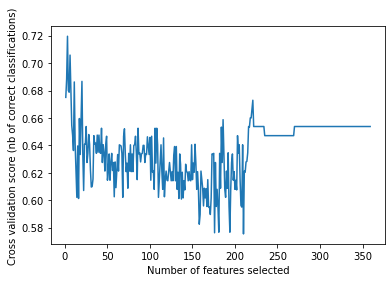

In [356]:
# ======================
# SVM (Linear) - RFECV
# Male ( MCI VS. AD )
# ======================

svm_clf10 = SVC(kernel="linear", random_state=42)
start = time.process_time()

min_features_to_select = 1  # Mini mum number of features to consider
rfecv_svm03 = RFECV(estimator=svm_clf10, step=1, cv=StratifiedKFold(10), scoring='accuracy', 
                min_features_to_select=min_features_to_select, n_jobs=-1)

rfecv_svm03.fit(x_train03, y_train03)
rfecv_svm03_x_train03 = rfecv_svm03.transform(x_train03)
rfecv_svm03_x_test03 = rfecv_svm03.transform(x_test03)


print("Optimal number of features : %d" % rfecv_svm03.n_features_)
print("Time: ", time.process_time() - start)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_svm03.grid_scores_) + min_features_to_select),
         rfecv_svm03.grid_scores_)
plt.show()

In [357]:
cols = rfecv_svm03.get_support(indices=True)
x_train_new = x_train03.iloc[:,cols]

x_train_new.columns.values.tolist()      # Optimal feature's name

['lh.transversetemporal.volume', 'rh.superiortemporal.area', 'Left.Amygdala']

---
- __Only use the data after RFECV__

In [358]:
# ======================
# Training set ( After RFECV)
# Male ( MCI VS. AD )
# ======================

svm_clf11 = SVC(kernel="linear", random_state=42)
start = time.process_time()
svm_clf11.fit(rfecv_svm03_x_train03, y_train03)

pred = cross_val_predict(svm_clf11, rfecv_svm03_x_train03, y_train03, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train03, pred))
print(classification_report(y_train03, pred))

Time:  0.90625
[[74 18]
 [30 34]]
              precision    recall  f1-score   support

         2.0       0.71      0.80      0.76        92
         3.0       0.65      0.53      0.59        64

    accuracy                           0.69       156
   macro avg       0.68      0.67      0.67       156
weighted avg       0.69      0.69      0.69       156



In [359]:
# ======================
# Testing set (After RFECV)
# Male ( MCI VS. AD )
# ======================

start = time.process_time()

pred = cross_val_predict(svm_clf11, rfecv_svm03_x_test03, y_test03, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test03, pred))
print(classification_report(y_test03, pred))

Time:  0.03125
[[19  4]
 [ 5 11]]
              precision    recall  f1-score   support

         2.0       0.79      0.83      0.81        23
         3.0       0.73      0.69      0.71        16

    accuracy                           0.77        39
   macro avg       0.76      0.76      0.76        39
weighted avg       0.77      0.77      0.77        39



---
- __RFECV (SVM) + Feature scaling + PCA__

[0.53651493 0.27405043 0.18943463]
[1.61992896 0.8274555  0.57197038]
Components: 3
Time:  0.1875
[[74 18]
 [28 36]]
              precision    recall  f1-score   support

         2.0       0.73      0.80      0.76        92
         3.0       0.67      0.56      0.61        64

    accuracy                           0.71       156
   macro avg       0.70      0.68      0.69       156
weighted avg       0.70      0.71      0.70       156



Text(0, 0.5, 'cumulative explained variance')

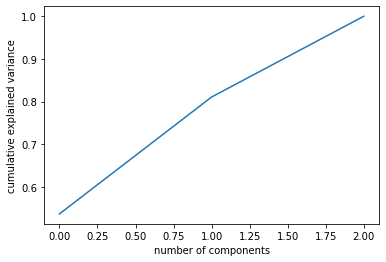

In [364]:
# ======================
# Training set
# Male ( MCI VS. AD )
# ======================


svm_clf12 = SVC(kernel="linear", random_state=42)
start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_svm03_x_train03)

# Dimension reduction
pca = PCA(n_components=3)  # n_components
x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

print (pca.explained_variance_ratio_)
print (pca.explained_variance_)
print ("Components:",pca.n_components_)

svm_clf12.fit(x_train_scaled_reduced, y_train03)


pred = cross_val_predict(svm_clf12, x_train_scaled_reduced, y_train03, cv=10)


print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train03, pred))
print(classification_report(y_train03, pred))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [368]:
# =======================
# Testing set
# Male ( MCI VS. AD )
# =======================


start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(rfecv_svm03_x_test03)

# Dimension reduction
pca = PCA(n_components=3)
x_test_scaled_reduced = pca.fit_transform(x_test_scaled)

print ("Components:",pca.n_components_)

# confusion matrix
pred = cross_val_predict(svm_clf12, x_test_scaled_reduced, y_test03, cv=10)


print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test03, pred))
print(classification_report(y_test03, pred))

Components: 3
Time:  0.03125
[[20  3]
 [ 5 11]]
              precision    recall  f1-score   support

         2.0       0.80      0.87      0.83        23
         3.0       0.79      0.69      0.73        16

    accuracy                           0.79        39
   macro avg       0.79      0.78      0.78        39
weighted avg       0.79      0.79      0.79        39



<hr style="border:px solid black"> </hr>

## 4.3.2 Logistic Regression
- __Baseline__

In [370]:
# =======================
# Training set
# Male ( MCI VS. AD )
# =======================


log_reg09 = LogisticRegression(max_iter=60000, penalty='l2', random_state=42)
start = time.process_time()
log_reg09.fit(x_train03, y_train03)

pred = cross_val_predict(log_reg09, x_train03, y_train03, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train03, pred))
print(classification_report(y_train03, pred))

Time:  77.625
[[68 24]
 [29 35]]
              precision    recall  f1-score   support

         2.0       0.70      0.74      0.72        92
         3.0       0.59      0.55      0.57        64

    accuracy                           0.66       156
   macro avg       0.65      0.64      0.64       156
weighted avg       0.66      0.66      0.66       156



In [371]:
# =======================
# Testing set
# Male ( MCI VS. AD )
# =======================


start = time.process_time()

pred = cross_val_predict(log_reg09, x_test03, y_test03, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test03, pred))
print(classification_report(y_test03, pred))

Time:  0.46875
[[16  7]
 [ 5 11]]
              precision    recall  f1-score   support

         2.0       0.76      0.70      0.73        23
         3.0       0.61      0.69      0.65        16

    accuracy                           0.69        39
   macro avg       0.69      0.69      0.69        39
weighted avg       0.70      0.69      0.69        39



---
- __Feature Selection - RFECV (Logistic Regression)__

Optimal number of features : 127
Time:  1465.59375


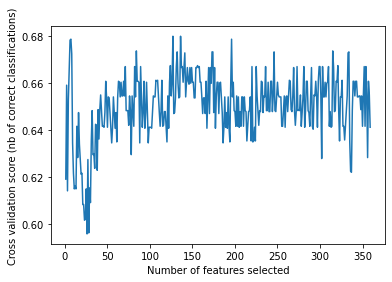

In [372]:
# ==============================
# Male ( MCI VS. AD )
# Logistic Regression - RFECV
# ==============================


log_reg10 = LogisticRegression(max_iter=100000000, penalty='l2', random_state=42)
start = time.process_time()

min_features_to_select = 1  # Mini mum number of features to consider
rfecv_lr03 = RFECV(estimator=log_reg10, step=1, cv=StratifiedKFold(10), scoring='accuracy', 
                min_features_to_select=min_features_to_select, n_jobs=-1)

rfecv_lr03.fit(x_train03, y_train03)
rfecv_lr03_x_train03 = rfecv_lr03.transform(x_train03)
rfecv_lr03_x_test03 = rfecv_lr03.transform(x_test03)


print("Optimal number of features : %d" % rfecv_lr03.n_features_)
print("Time: ", time.process_time() - start)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_lr03.grid_scores_) + min_features_to_select),
         rfecv_lr03.grid_scores_)
plt.show()

In [373]:
cols = rfecv_lr03.get_support(indices=True)
x_train_new = x_train03.iloc[:,cols]

x_train_new.columns.values.tolist()      # Optimal feature's name

['lh.bankssts.volume',
 'lh.caudalanteriorcingulate.volume',
 'lh.caudalmiddlefrontal.volume',
 'lh.entorhinal.volume',
 'lh.fusiform.volume',
 'lh.inferiorparietal.volume',
 'lh.inferiortemporal.volume',
 'lh.isthmuscingulate.volume',
 'lh.lateraloccipital.volume',
 'lh.lateralorbitofrontal.volume',
 'lh.medialorbitofrontal.volume',
 'lh.paracentral.volume',
 'lh.parsorbitalis.volume',
 'lh.parstriangularis.volume',
 'lh.pericalcarine.volume',
 'lh.posteriorcingulate.volume',
 'lh.precuneus.volume',
 'lh.rostralanteriorcingulate.volume',
 'lh.superiorparietal.volume',
 'lh.superiortemporal.volume',
 'lh.frontalpole.volume',
 'lh.temporalpole.volume',
 'lh.transversetemporal.volume',
 'lh.insula.volume',
 'rh.caudalanteriorcingulate.volume',
 'rh.cuneus.volume',
 'rh.entorhinal.volume',
 'rh.fusiform.volume',
 'rh.inferiorparietal.volume',
 'rh.inferiortemporal.volume',
 'rh.isthmuscingulate.volume',
 'rh.lateralorbitofrontal.volume',
 'rh.lingual.volume',
 'rh.medialorbitofrontal.volu

---
- __Only use the data after RFECV__

In [386]:
# =======================
# Training set (RFECV)
# Male ( MCI VS. AD )
# =======================


log_reg11 = LogisticRegression(max_iter=60000, penalty='l2', random_state=43)
start = time.process_time()
log_reg11.fit(rfecv_lr03_x_train03, y_train03)

pred = cross_val_predict(log_reg11, rfecv_lr03_x_train03, y_train03, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train03, pred))
print(classification_report(y_train03, pred))

Time:  3.765625
[[72 20]
 [20 44]]
              precision    recall  f1-score   support

         2.0       0.78      0.78      0.78        92
         3.0       0.69      0.69      0.69        64

    accuracy                           0.74       156
   macro avg       0.74      0.74      0.74       156
weighted avg       0.74      0.74      0.74       156



In [387]:
# =======================
# rfecv - test set
# =======================


start = time.process_time()

pred = cross_val_predict(log_reg11, rfecv_lr03_x_test03, y_test03, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test03, pred))
print(classification_report(y_test03, pred))

Time:  0.03125
[[16  7]
 [ 6 10]]
              precision    recall  f1-score   support

         2.0       0.73      0.70      0.71        23
         3.0       0.59      0.62      0.61        16

    accuracy                           0.67        39
   macro avg       0.66      0.66      0.66        39
weighted avg       0.67      0.67      0.67        39



---
- __RFECV (Logistic Regression) + Feature scaling + PCA__

In [482]:
rfecv_lr03_x_train03.shape

(156, 127)

In [483]:
rfecv_lr03_x_test03.shape

(39, 127)

In [486]:
# =======================
##### train set
# =======================


log_reg12 = LogisticRegression(max_iter=60000, penalty='l2', random_state=42)
start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_lr03_x_train03)

# Dimension reduction
pca = PCA(n_components=5)    # 0.55
x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

print ("Components:",pca.n_components_)

log_reg08.fit(x_train_scaled_reduced, y_train03)

pred = cross_val_predict(log_reg12, x_train_scaled_reduced, y_train03, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(y_train03, pred))
print(classification_report(y_train03, pred))

Components: 5
Times:  0.59375
Confusion matrix: 
 [[76 16]
 [18 46]]
              precision    recall  f1-score   support

         2.0       0.81      0.83      0.82        92
         3.0       0.74      0.72      0.73        64

    accuracy                           0.78       156
   macro avg       0.78      0.77      0.77       156
weighted avg       0.78      0.78      0.78       156



Text(0, 0.5, 'cumulative explained variance')

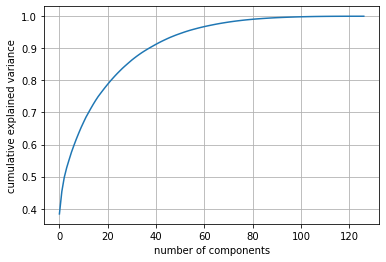

In [477]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


In [487]:
# =======================
# test set
# =======================


start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_lr03_x_test03)

# Dimension reduction
pca = PCA(n_components=5)    # 0.6
x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

print ("Components:",pca.n_components_)

pred = cross_val_predict(log_reg12, x_train_scaled_reduced, y_test03, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(y_test03, pred))
print(classification_report(y_test03, pred))

Components: 5
Times:  0.21875
Confusion matrix: 
 [[20  3]
 [ 4 12]]
              precision    recall  f1-score   support

         2.0       0.83      0.87      0.85        23
         3.0       0.80      0.75      0.77        16

    accuracy                           0.82        39
   macro avg       0.82      0.81      0.81        39
weighted avg       0.82      0.82      0.82        39



Text(0, 0.5, 'cumulative explained variance')

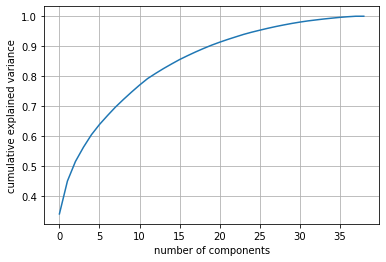

In [479]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

<hr style="border:px solid black"> </hr>

## 4.3.3 Decision Tree
- __Baseline__

In [488]:
# =======================
# Training set
# Male ( MCI VS. AD )
# =======================


tree_clf09 = DecisionTreeClassifier(random_state=42)
start = time.process_time()
tree_clf09.fit(x_train03, y_train03)

pred = cross_val_predict(tree_clf09, x_train03, y_train03, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train03, pred))
print(classification_report(y_train03, pred))

Time:  0.234375
[[65 27]
 [21 43]]
              precision    recall  f1-score   support

         2.0       0.76      0.71      0.73        92
         3.0       0.61      0.67      0.64        64

    accuracy                           0.69       156
   macro avg       0.69      0.69      0.69       156
weighted avg       0.70      0.69      0.69       156



In [489]:
# =======================
# Testing set
# Male ( MCI VS. AD )
# =======================


start = time.process_time()

pred = cross_val_predict(tree_clf09, x_test03, y_test03, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test03, pred))
print(classification_report(y_test03, pred))

Time:  0.09375
[[15  8]
 [ 5 11]]
              precision    recall  f1-score   support

         2.0       0.75      0.65      0.70        23
         3.0       0.58      0.69      0.63        16

    accuracy                           0.67        39
   macro avg       0.66      0.67      0.66        39
weighted avg       0.68      0.67      0.67        39



---
- __Feature Selection - RFECV (Decision Tree)__

Optimal number of features : 170
Time:  2.578125


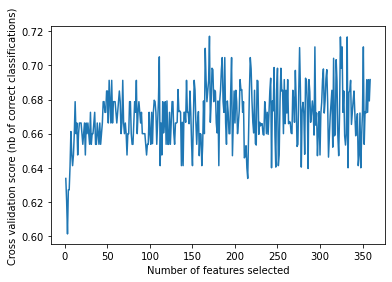

In [227]:
# =======================
# Male ( MCI VS. AD )
# Decision Tree - RFECV
# =======================


tree_clf10 = DecisionTreeClassifier(random_state=42)
start = time.process_time()

min_features_to_select = 1  # Mini mum number of features to consider
rfecv_tree03 = RFECV(estimator=tree_clf10, step=1, cv=StratifiedKFold(10), scoring='accuracy', 
                min_features_to_select=min_features_to_select, n_jobs=-1)

rfecv_tree03.fit(x_train03, y_train03)
rfecv_tree03_x_train03 = rfecv_tree03.transform(x_train03)
rfecv_tree03_x_test03 = rfecv_tree03.transform(x_test03)


print("Optimal number of features : %d" % rfecv_tree03.n_features_)
print("Time: ", time.process_time() - start)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_tree03.grid_scores_) + min_features_to_select),
         rfecv_tree03.grid_scores_)
plt.show()

In [491]:
cols = rfecv_tree03.get_support(indices=True)
x_train_new05 = x_train03.iloc[:,cols]

x_train_new05.columns.values.tolist()      # Optimal feature's name

['lh.middletemporal.thickness',
 'lh.parahippocampal.thickness',
 'lh.paracentral.thickness',
 'lh.parsopercularis.thickness',
 'lh.parsorbitalis.thickness',
 'lh.parstriangularis.thickness',
 'lh.pericalcarine.thickness',
 'lh.postcentral.thickness',
 'lh.posteriorcingulate.thickness',
 'lh.precentral.thickness',
 'lh.precuneus.thickness',
 'lh.rostralanteriorcingulate.thickness',
 'lh.rostralmiddlefrontal.thickness',
 'lh.superiorfrontal.thickness',
 'lh.superiorparietal.thickness',
 'lh.superiortemporal.thickness',
 'lh.supramarginal.thickness',
 'lh.frontalpole.thickness',
 'lh.temporalpole.thickness',
 'lh.transversetemporal.thickness',
 'lh.insula.thickness',
 'lh.MeanThickness.thickness',
 'rh.bankssts.thickness',
 'rh.caudalanteriorcingulate.thickness',
 'rh.caudalmiddlefrontal.thickness',
 'rh.cuneus.thickness',
 'rh.entorhinal.thickness',
 'rh.fusiform.thickness',
 'rh.inferiorparietal.thickness',
 'rh.inferiortemporal.thickness',
 'rh.isthmuscingulate.thickness',
 'rh.latera

- feature importances

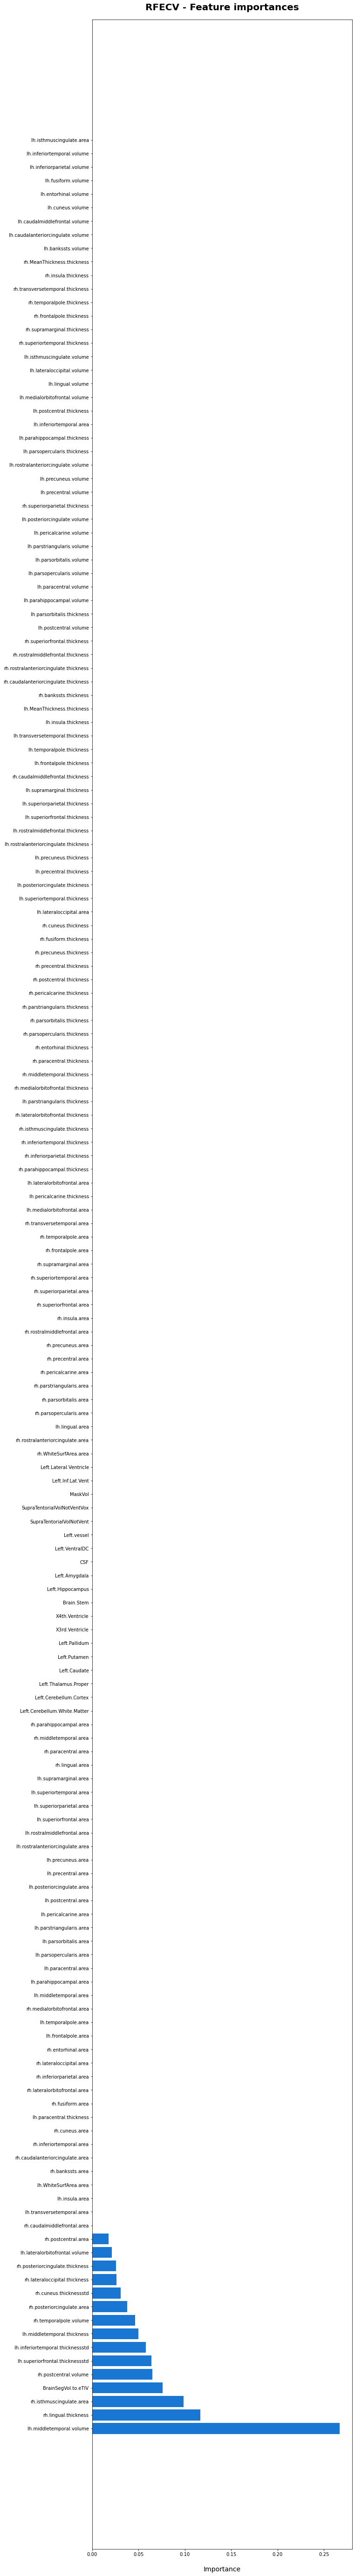

In [492]:
dset = pd.DataFrame()
dset['attr'] = x_train_new05.columns.values
dset['importance'] = rfecv_tree03.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 100))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

---
- __Only use the data after RFECV__

In [37]:
# =========================
# Training set (RFECV)
# Male ( MCI VS. AD )
# =========================


tree_clf11 = DecisionTreeClassifier(random_state=50)
start = time.process_time()
tree_clf11.fit(rfecv_tree03_x_train03, y_train03)

pred = cross_val_predict(tree_clf11, rfecv_tree03_x_train03, y_train03, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train03, pred))
print(classification_report(y_train03, pred))

Time:  0.03125
[[66 26]
 [34 30]]
              precision    recall  f1-score   support

         2.0       0.66      0.72      0.69        92
         3.0       0.54      0.47      0.50        64

    accuracy                           0.62       156
   macro avg       0.60      0.59      0.59       156
weighted avg       0.61      0.62      0.61       156



In [38]:
# =========================
# Testing set (RFECV)
# Male ( MCI VS. AD )
# =========================


start = time.process_time()

pred = cross_val_predict(tree_clf11, rfecv_tree03_x_test03, y_test03, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test03, pred))
print(classification_report(y_test03, pred))

Time:  0.015625
[[18  5]
 [ 6 10]]
              precision    recall  f1-score   support

         2.0       0.75      0.78      0.77        23
         3.0       0.67      0.62      0.65        16

    accuracy                           0.72        39
   macro avg       0.71      0.70      0.71        39
weighted avg       0.72      0.72      0.72        39



---
- __RFECV (DT) + Feature scaling + PCA__

In [239]:
# ======================
# Training set
# Male ( MCI VS. AD )
# ======================

tree_clf12 = DecisionTreeClassifier(random_state=42)
start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_tree03_x_train03)

# Dimension reduction
pca = PCA(n_components=0.95)  # n_components
x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

#print (pca.explained_variance_ratio_)
#print (pca.explained_variance_)
print ("Components:",pca.n_components_)

tree_clf12.fit(x_train_scaled_reduced, y_train03)


pred = cross_val_predict(tree_clf12, x_train_scaled_reduced, y_train03, cv=10)


print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train03, pred))
print(classification_report(y_train03, pred))

Components: 66
Time:  0.375
[[63 29]
 [26 38]]
              precision    recall  f1-score   support

         2.0       0.71      0.68      0.70        92
         3.0       0.57      0.59      0.58        64

    accuracy                           0.65       156
   macro avg       0.64      0.64      0.64       156
weighted avg       0.65      0.65      0.65       156



In [238]:
# =======================
# Testing set
# Male ( MCI VS. AD )
# =======================


start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(rfecv_tree03_x_test03)

# Dimension reduction
pca = PCA(n_components=0.95)
x_test_scaled_reduced = pca.fit_transform(x_test_scaled)

print ("Components:",pca.n_components_)

# confusion matrix
pred = cross_val_predict(tree_clf12, x_test_scaled_reduced, y_test03, cv=10)


print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test03, pred))
print(classification_report(y_test03, pred))

Components: 28
Time:  0.109375
[[20  3]
 [ 3 13]]
              precision    recall  f1-score   support

         2.0       0.87      0.87      0.87        23
         3.0       0.81      0.81      0.81        16

    accuracy                           0.85        39
   macro avg       0.84      0.84      0.84        39
weighted avg       0.85      0.85      0.85        39



<hr style="border:px solid black"> </hr>

## 4.3.4 Random Forest
- __Baseline__

In [620]:
# =======================
# Training set
# Male ( MCI VS. AD )
# =======================


start = time.process_time()
forest_clf09 = RandomForestClassifier(random_state=42)
forest_clf09.fit(x_train03, y_train03)

pred = cross_val_predict(forest_clf09, x_train03, y_train03, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train03, pred))
print(classification_report(y_train03, pred))

Time:  1.765625
[[79 13]
 [24 40]]
              precision    recall  f1-score   support

         2.0       0.77      0.86      0.81        92
         3.0       0.75      0.62      0.68        64

    accuracy                           0.76       156
   macro avg       0.76      0.74      0.75       156
weighted avg       0.76      0.76      0.76       156



In [621]:
# =======================
# Testing set
# Male ( MCI VS. AD )
# =======================

start = time.process_time()

pred = cross_val_predict(forest_clf09, x_test03, y_test03, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test03, pred))
print(classification_report(y_test03, pred))

Time:  1.171875
[[20  3]
 [ 6 10]]
              precision    recall  f1-score   support

         2.0       0.77      0.87      0.82        23
         3.0       0.77      0.62      0.69        16

    accuracy                           0.77        39
   macro avg       0.77      0.75      0.75        39
weighted avg       0.77      0.77      0.76        39



---
- __Feature Selection - RFECV (Random Forest)__

Optimal number of features : 134
Time:  33.953125


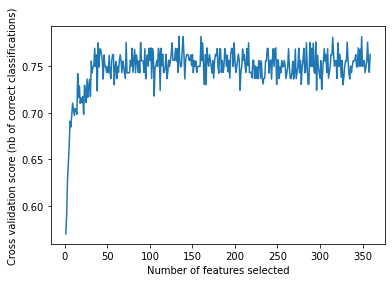

In [241]:
# =======================
# Male ( MCI VS. AD )
# Random Forest - RFECV
# =======================


forest_clf10 = RandomForestClassifier(random_state=42)
start = time.process_time()

min_features_to_select = 1  # Mini mum number of features to consider
rfecv_forest03 = RFECV(estimator=forest_clf10, step=1, cv=StratifiedKFold(10), scoring='accuracy', 
                min_features_to_select=min_features_to_select, n_jobs=-1)

rfecv_forest03.fit(x_train03, y_train03)
rfecv_forest03_x_train03 = rfecv_forest03.transform(x_train03)
rfecv_forest03_x_test03 = rfecv_forest03.transform(x_test03)


print("Optimal number of features : %d" % rfecv_forest03.n_features_)
print("Time: ", time.process_time() - start)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_forest03.grid_scores_) + min_features_to_select),
         rfecv_forest03.grid_scores_)
plt.show()

In [623]:
cols = rfecv_forest03.get_support(indices=True)
x_train_new06 = x_train03.iloc[:,cols]

x_train_new06.columns.values.tolist()      # Optimal feature's name

['lh.caudalanteriorcingulate.thickness',
 'lh.caudalmiddlefrontal.thickness',
 'lh.entorhinal.thickness',
 'lh.fusiform.thickness',
 'lh.inferiorparietal.thickness',
 'lh.lateraloccipital.thickness',
 'lh.lingual.thickness',
 'lh.paracentral.thickness',
 'lh.postcentral.thickness',
 'lh.superiorfrontal.thickness',
 'lh.superiorparietal.thickness',
 'lh.MeanThickness.thickness',
 'rh.bankssts.thickness',
 'rh.entorhinal.thickness',
 'rh.fusiform.thickness',
 'rh.inferiorparietal.thickness',
 'rh.inferiortemporal.thickness',
 'rh.lateraloccipital.thickness',
 'rh.lingual.thickness',
 'rh.parahippocampal.thickness',
 'rh.precuneus.thickness',
 'rh.temporalpole.thickness',
 'lh.caudalmiddlefrontal.volume',
 'lh.cuneus.volume',
 'lh.entorhinal.volume',
 'lh.inferiorparietal.volume',
 'lh.inferiortemporal.volume',
 'lh.lateraloccipital.volume',
 'lh.lingual.volume',
 'lh.middletemporal.volume',
 'lh.parahippocampal.volume',
 'lh.paracentral.volume',
 'lh.parsorbitalis.volume',
 'lh.pericalca

- feature importances

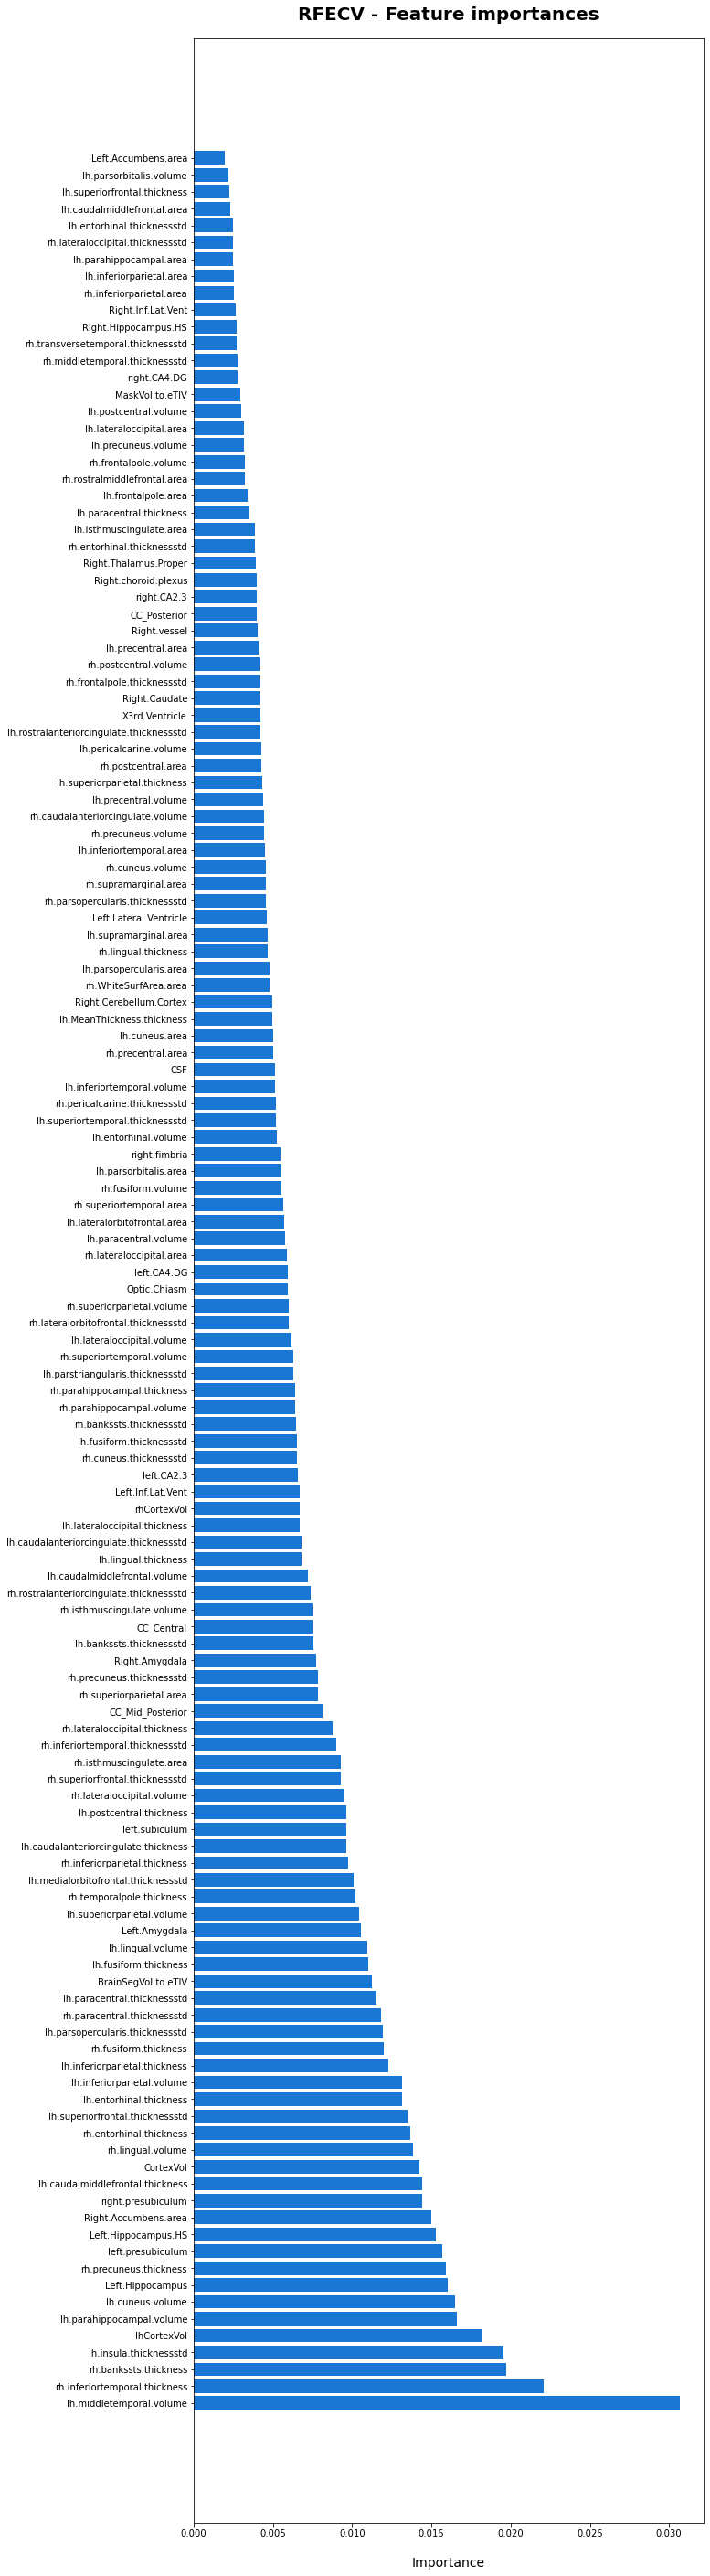

In [626]:
dset = pd.DataFrame()
dset['attr'] = x_train_new06.columns.values
dset['importance'] = rfecv_forest03.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 50))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

---
- __Only use the data after RFECV__

In [725]:
# =======================
# Training set (RFECV)
# Male ( MCI VS. AD )
# =======================


forest_clf11 = RandomForestClassifier(random_state=42)
start = time.process_time()
forest_clf11.fit(rfecv_forest03_x_train03, y_train03)

pred = cross_val_predict(forest_clf11, rfecv_forest03_x_train03, y_train03, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train03, pred))
print(classification_report(y_train03, pred))

Time:  0.171875
[[79 13]
 [22 42]]
              precision    recall  f1-score   support

         2.0       0.78      0.86      0.82        92
         3.0       0.76      0.66      0.71        64

    accuracy                           0.78       156
   macro avg       0.77      0.76      0.76       156
weighted avg       0.77      0.78      0.77       156



In [726]:
# =======================
# Testing set (RFECV)
# Male ( MCI VS. MCI )
# =======================


start = time.process_time()

pred = cross_val_predict(forest_clf11, rfecv_forest03_x_test03, y_test03, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test03, pred))
print(classification_report(y_test03, pred))

Time:  0.03125
[[20  3]
 [ 5 11]]
              precision    recall  f1-score   support

         2.0       0.80      0.87      0.83        23
         3.0       0.79      0.69      0.73        16

    accuracy                           0.79        39
   macro avg       0.79      0.78      0.78        39
weighted avg       0.79      0.79      0.79        39



---
- __RFECV (RF) + Feature scaling + PCA__

In [242]:
# ======================
# Training set
# Male ( CN VS. MCI )
# ======================

forest_clf12 = RandomForestClassifier(random_state=42)
start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_forest03_x_train03)

# Dimension reduction
pca = PCA(n_components=5)  # n_components
x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

#print (pca.explained_variance_ratio_)
#print (pca.explained_variance_)
print ("Components:",pca.n_components_)

forest_clf12.fit(x_train_scaled_reduced, y_train03)


pred = cross_val_predict(forest_clf12, x_train_scaled_reduced, y_train03, cv=10)


print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train03, pred))
print(classification_report(y_train03, pred))

Components: 5
Time:  2.328125
[[75 17]
 [18 46]]
              precision    recall  f1-score   support

         2.0       0.81      0.82      0.81        92
         3.0       0.73      0.72      0.72        64

    accuracy                           0.78       156
   macro avg       0.77      0.77      0.77       156
weighted avg       0.78      0.78      0.78       156



In [255]:
# =======================
# Testing set
# Male ( CN VS. MCI )
# =======================


start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(rfecv_forest03_x_test03)

# Dimension reduction
pca = PCA(n_components=5)
x_test_scaled_reduced = pca.fit_transform(x_test_scaled)

print ("Components:",pca.n_components_)

# confusion matrix
pred = cross_val_predict(forest_clf12, x_test_scaled_reduced, y_test03, cv=10)


print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test03, pred))
print(classification_report(y_test03, pred))

Components: 5
Time:  2.109375
[[20  3]
 [ 5 11]]
              precision    recall  f1-score   support

         2.0       0.80      0.87      0.83        23
         3.0       0.79      0.69      0.73        16

    accuracy                           0.79        39
   macro avg       0.79      0.78      0.78        39
weighted avg       0.79      0.79      0.79        39

